
# NetworkX Tutorial

NetworkX - одна из наиболее часто используемых библиотек Python для создания, манипуляций и анализа графов.

Основные части данного примера адаптированы из https://colab.research.google.com/github/jdwittenauer/ipython-notebooks/blob/master/notebooks/libraries/NetworkX.ipynb#scrollTo=zA1OO6huHeV6

## Установка

In [ ]:
# Импортируем пакет NetworkX
import networkx as nx

## Граф

NetworkX содержить несколько классов для хранения графов различного типа, такаих как ориентированные (directed) и неориентированные (undirected). Также доступны классы для создания мультиграфов (одновременно ориентированных и неориентированных).

Для более детальной информации, пожалуйста обратитесь к [документации о типах графов NetworkX](https://networkx.org/documentation/stable/reference/classes/index.html).

In [ ]:
# Создадим неориентированный граф G
G = nx.Graph()
print(G.is_directed())

# Создадим ориентированный граф H
H = nx.DiGraph()
print(H.is_directed())

# Добавим свойство на уровне графа
G.graph["Name"] = "Bar"
print(G.graph)

False
True
{'Name': 'Bar'}


## Вершина

Вершины (с атрибутами) можно легко добавлять в графы NetworkX.

In [ ]:
# Добавим одну вершину с аттрибутами
G.add_node(0, feature=0, label=0)

# Посмотрим на свойства вершины 0
node_0_attr = G.nodes[0]
print("Node 0 has the attributes {}".format(node_0_attr))

Node 0 has the attributes {'feature': 0, 'label': 0}


In [ ]:
# Добавим несколько вершин со свойствами
G.add_nodes_from([
  (1, {"feature": 1, "label": 1}),
  (2, {"feature": 2, "label": 2})
])

# Пройдём циклом по всем вершинам
# Установка флага data=True вернёт свойства вершин
for node in G.nodes(data=True):
  print(node)

# Получим количество вершин
num_nodes = G.number_of_nodes()
print("G has {} nodes".format(num_nodes))

(0, {'feature': 0, 'label': 0})
(1, {'feature': 1, 'label': 1})
(2, {'feature': 2, 'label': 2})
G has 3 nodes


## Ребро

Подобно вершинам, рёбра (с аттрибутами) также можно легко добавлять к графам NetworkX.

In [ ]:
# Добавим одно ребро с весом 0.5
G.add_edge(0, 1, weight=0.5)

# Посмотрим свойства ребра (0, 1)
edge_0_1_attr = G.edges[(0, 1)]
print("Edge (0, 1) has the attributes {}".format(edge_0_1_attr))

Edge (0, 1) has the attributes {'weight': 0.5}


In [ ]:
# Добавим несколько вершин с весами
G.add_edges_from([
  (1, 2, {"weight": 0.3}),
  (2, 0, {"weight": 0.1})
])

# Пройдём циклом по всем рёбрам
# В данном примере нет флага data=True, поэтому вызов вернёт лишь рёбра
for edge in G.edges():
  print(edge)

# Получим количество рёбер
num_edges = G.number_of_edges()
print("G has {} edges".format(num_edges))

(0, 1)
(0, 2)
(1, 2)
G has 3 edges


## Визуализация

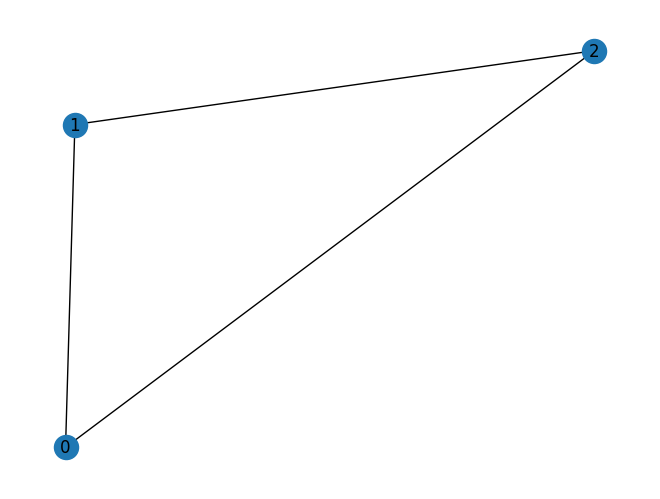

In [ ]:
# Нарисуем граф
nx.draw(G, with_labels = True)

## Степень и соседство вершин

In [ ]:
node_id = 1

# Степень вершины 1
print("Node {} has degree {}".format(node_id, G.degree[node_id]))

# Соседи вершины 1
for neighbor in G.neighbors(node_id):
  print("Node {} has neighbor {}".format(node_id, neighbor))

Node 1 has degree 2
Node 1 has neighbor 0
Node 1 has neighbor 2


## Прочие функции

NetworkX содержит множество методов для изучения графов.

Вот пример вычисления [PageRank](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html#networkx.algorithms.link_analysis.pagerank_alg.pagerank) вершин (мы поговорим о PageRank в одной из лекций*).

\* Кроме того, реализации PageRank посвящено отдельное домашнее задание (прим. пер.)

{0: 0.17857162031103999,
 1: 0.32142837968896,
 2: 0.32142837968896,
 3: 0.17857162031103999}

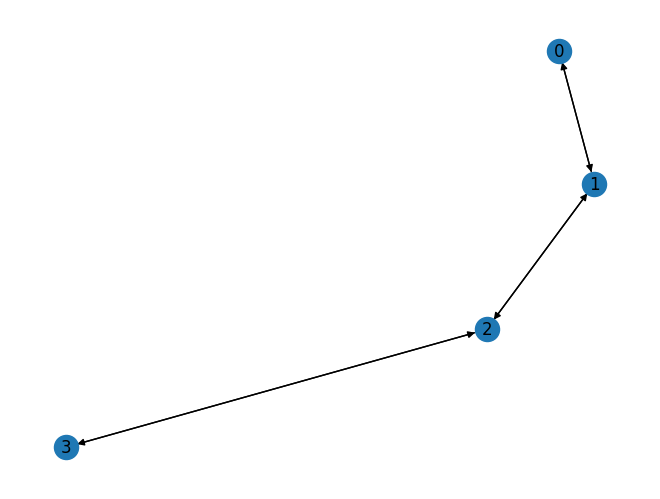

In [ ]:
num_nodes = 4
# Создадим граф-цепь и преобразуем его в ориентированный граф
G = nx.DiGraph(nx.path_graph(num_nodes))
nx.draw(G, with_labels = True)

# Вычислим PageRank
pr = nx.pagerank(G, alpha=0.8)
pr

## Документация

Вы можете ознакомиться с прочими функциями NetworkX в [документации](https://networkx.org/documentation/stable/).

# PyTorch Geometric Tutorial

PyTorch Geometric (PyG) - это библиотека для PyTorch. Она содержит полезные примитивы для разработки моделей глубокого обучения на графах, включая разнообразные слои графовых нейронных сетей и обширную коллекцию наборов данных.

Сохраняйте спокойствие если непонятны некоторые концепции, такие как `GCNConv` -- мы рассмотрим их в последующих лекциях :)

Этот пример адаптирован из https://colab.research.google.com/drive/1h3-vJGRVloF5zStxL5I0rSy4ZUPNsjy8?usp=sharing#scrollTo=ci-LpZWhRJoI by [Matthias Fey](https://rusty1s.github.io/#/)


In [ ]:
#!pip install torch==1.7.1

In [ ]:
import torch
print("PyTorch has version {}".format(torch.__version__))

PyTorch has version 2.2.1+cu121


## Установка

Инсталляция PyG в среде Colab может оказаться нетривиальной. Запустите блок с кодом ниже -- в случае неполадок более подробная информация находится на [странице установки PyG](https://pytorch-geometric.readthedocs.io/en/latest/notes/installation.html).

In [ ]:
# Install torch geometric
#!pip install -q torch-scatter -f https://pytorch-geometric.com/whl/torch-1.7.0+cu101.html
#!pip install -q torch-sparse -f https://pytorch-geometric.com/whl/torch-1.7.0+cu101.html
'''
!pip install -q torch-scatter -f https://pytorch-geometric.com/whl/torch-1.8.0+cu101.html
!pip install -q torch-sparse -f https://pytorch-geometric.com/whl/torch-1.8.0+cu101.html
!pip install -q torch-geometric
'''

'\n!pip install -q torch-scatter -f https://pytorch-geometric.com/whl/torch-1.8.0+cu101.html\n!pip install -q torch-sparse -f https://pytorch-geometric.com/whl/torch-1.8.0+cu101.html\n!pip install -q torch-geometric\n'

In [ ]:
!pip install torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.3 MB/s eta 0:00:00


## Визуализация

In [ ]:
# Вспомогательная функция для визуализации.
%matplotlib inline
import torch
import networkx as nx
import matplotlib.pyplot as plt

# Функция для визуализации графа NX или тензора PyTorch
def visualize(h, color, epoch=None, loss=None):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])

    if torch.is_tensor(h):
        h = h.detach().cpu().numpy()
        plt.scatter(h[:, 0], h[:, 1], s=140, c=color, cmap="Set2")
        if epoch is not None and loss is not None:
            plt.xlabel(f'Epoch: {epoch}, Loss: {loss.item():.4f}', fontsize=16)
    else:
        nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), with_labels=False,
                         node_color=color, cmap="Set2")
    plt.show()

## Вступление

С недавних пор глубокое обучение на графах стало одной из самых горячих областей исследования в сообществе машинного обучения.

Здесь графовые нейронные сети (**Graph Neural Networks (GNNs)**) стремятся обобщить классические концепции глубокого обучения к нерегулярно структурированным данным (в противовес картинкам или текстам) и дать нейронным сетям возможность работы с объектами и их отношениями.

Данный пример ознакомит вас с несколькими фундаментальными концепциями глубокого обучения на графах с помощью графовых нейронных сетей и библиотеки **[PyTorch Geometric (PyG)](https://github.com/rusty1s/pytorch_geometric)**.
PyTorch Geometric - это библиотека-расширение популярной среды глубокого обучения [PyTorch](https://pytorch.org/), содержащая разнообразные инструменты и методы, облегчающие реализацию графовых нейронных сетей.

По следам [Kipf et al. (2017)](https://arxiv.org/abs/1609.02907), погрузимся в мир GNN и рассмотрим известный пример клуба каратистов [**Zachary's karate club network**](https://en.wikipedia.org/wiki/Zachary%27s_karate_club). Этот граф описывает социальную сеть 34 членов клуба карате и документирует связи между учасниками, взаимодействовавшими вне клуба. Здесь мы заинтересованны в выделении сообществ, образующихся из взаимодействий одноклубников.

## Набор данных

PyTorch Geometric позволяет загрузить данные с помощью модуля[`torch_geometric.datasets`](https://pytorch-geometric.readthedocs.io/en/latest/modules/datasets.html#torch_geometric.datasets):

In [ ]:
from torch_geometric.datasets import KarateClub

dataset = KarateClub()
print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

Dataset: KarateClub():
Number of graphs: 1
Number of features: 34
Number of classes: 4


После инициализации набора данных [`KarateClub`](https://pytorch-geometric.readthedocs.io/en/latest/modules/datasets.html#torch_geometric.datasets.KarateClub), мы можем для начала проверить его свойства.

Например, мы видим, что набор данных содержит ровно **один граф**, а также - что каждой вершине назначен **34-мерный вектор свойств** (который уникально описывает членов клуба каратистов).

Далее, граф содержит ровно **4 класса**, описывающие принадлежность вершин к сообществам.

Рассмотрим граф в деталях:

In [ ]:
data = dataset[0]  # Get the first graph object.

print(data)
print('==============================================================')

# Gather some statistics about the graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Number of training nodes: {data.train_mask.sum()}')
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Contains isolated nodes: {data.contains_isolated_nodes()}')
print(f'Contains self-loops: {data.contains_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])
Number of nodes: 34
Number of edges: 156
Average node degree: 4.59
Number of training nodes: 4
Training node label rate: 0.12
Contains isolated nodes: False
Contains self-loops: False
Is undirected: True


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'contains_isolated_nodes' is deprecated, use 'has_isolated_nodes' instead
  warnings.warn(out)
/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'contains_self_loops' is deprecated, use 'has_self_loops' instead
  warnings.warn(out)


In [ ]:
data.train_mask

tensor([ True, False, False, False,  True, False, False, False,  True, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False,  True, False, False, False, False, False,
        False, False, False, False])

In [ ]:
len(data.x[0])

34

In [ ]:
data.x.shape

torch.Size([34, 34])

In [ ]:
data.edge_index.shape

torch.Size([2, 156])

## Данные

Каждый граф в PyTorch Geometric представлен отдельным объектом [`Data`](https://pytorch-geometric.readthedocs.io/en/latest/modules/data.html#torch_geometric.data.Data), содержащим всю информацию, описывающую его. В любой момент мы можем вызвать `print(data)` и получить краткое резюме аттрибутов данных и их размерности:
```
Data(edge_index=[2, 156], x=[34, 34], y=[34], train_mask=[34])
```
Как видим, объект `data` содержит 4 атрибута:

(1) Свойство `edge_index` описывает **связность графа**, *т.е.*, индексы вершин - начальной и конечной, описывающие ребро. PyG описывает также   

(2) **свойства вершин** как `x` (каждой из 34 вершин назначен 34-мерный вектор свойств), и    

(3) **классы вершин** как `y` (каждой вершине назначен ровно один класс).  

(4) Также есть дополнительный атрибут `train_mask`, описывающий для каких вершин известна принадлежность к сообществам.

В целом, нам доступна информация о принадлежности сообщесвам лишь о 4 вершинах (по одной на каждое сообщество) и задача - определить, к каким классам отнести остающиеся вершины.


Объект `data` также предлагает **вспомогательные функции** для проверки некоторых базовых свойств графа.

Например, мы можем легко проверить есть ли в графе изолированные вершины(*т.е.* не принадлежащие ни одному из рёбер), есть ли в графе петли(*т.е.*, $(v, v) \in \mathcal{E}$), является ли граф неориентированным (*т.е.* $\forall (v, w) \in \mathcal{E} \exists (w, v) \in \mathcal{E}$).

In [ ]:
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

edge_index = data.edge_index
print(edge_index.t())

<IPython.core.display.Javascript object>

tensor([[ 0,  1],
        [ 0,  2],
        [ 0,  3],
        [ 0,  4],
        [ 0,  5],
        [ 0,  6],
        [ 0,  7],
        [ 0,  8],
        [ 0, 10],
        [ 0, 11],
        [ 0, 12],
        [ 0, 13],
        [ 0, 17],
        [ 0, 19],
        [ 0, 21],
        [ 0, 31],
        [ 1,  0],
        [ 1,  2],
        [ 1,  3],
        [ 1,  7],
        [ 1, 13],
        [ 1, 17],
        [ 1, 19],
        [ 1, 21],
        [ 1, 30],
        [ 2,  0],
        [ 2,  1],
        [ 2,  3],
        [ 2,  7],
        [ 2,  8],
        [ 2,  9],
        [ 2, 13],
        [ 2, 27],
        [ 2, 28],
        [ 2, 32],
        [ 3,  0],
        [ 3,  1],
        [ 3,  2],
        [ 3,  7],
        [ 3, 12],
        [ 3, 13],
        [ 4,  0],
        [ 4,  6],
        [ 4, 10],
        [ 5,  0],
        [ 5,  6],
        [ 5, 10],
        [ 5, 16],
        [ 6,  0],
        [ 6,  4],
        [ 6,  5],
        [ 6, 16],
        [ 7,  0],
        [ 7,  1],
        [ 7,  2],
        [ 

## Edge Index

Исследуя `edge_index`, мы можем детальнее разобраться с тем, как в PyG реализовано внутреннее представление представлением связности графа. Как видим, для каждого ребра `edge_index` содержит пару индексов вершин, где первое значение содержит индекс для начальной, а второе - конечной вершин ребра.

Это представление известно как **COO format (coordinate format)** широко используется для хранения разреженных матриц.

Вместо того, чтобы хранить информацию об инцидентности в виде матрицы связности $\mathbf{A} \in \{ 0, 1 \}^{|\mathcal{V}| \times |\mathcal{V}|}$, PyG представляет графы разреженно, что описывает хранение лишь координат и значений ненулевых элементов $\mathbf{A}$.

Мы можем визуализировать граф, приведя его к формату библиотеки `networkx`, содержащей также и инструменты для визуализации:

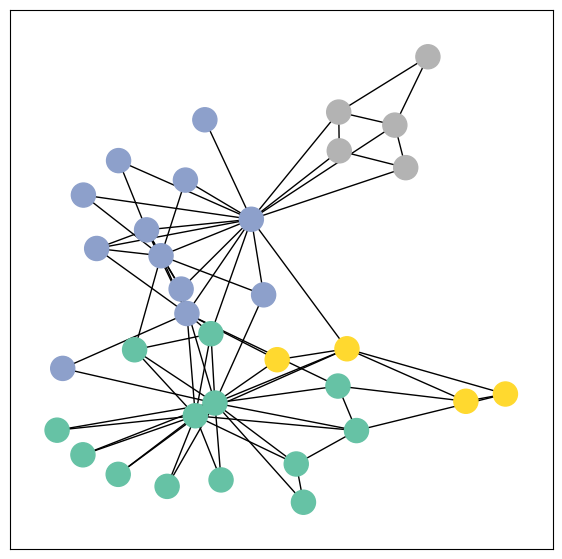

In [ ]:
from torch_geometric.utils import to_networkx

G = to_networkx(data, to_undirected=True)
visualize(G, color=data.y)

## Реализация графовых нейронных сетей

После того, как мы разобрались с тем, как PyG обращается с данными, пришло время реализовать нашу первую графовую нейронную сеть!

Для этого воспользуемся одним из самых простых операторов, слоем свёртки **GCN layer** ([Kipf et al. (2017)](https://arxiv.org/abs/1609.02907)).

PyG реализует этот слой посредством [`GCNConv`](https://pytorch-geometric.readthedocs.io/en/latest/modules/nn.html#torch_geometric.nn.conv.GCNConv), который принимает внутрь свойства вершин `x` и представление (COO) связности графа `edge_index`.

С этими инструментами мы готовы создать нашу первую графовую нейронную сеть, определив архитектуру в классе `torch.nn.Module`:

In [ ]:
import torch
from torch.nn import Linear
from torch_geometric.nn import GCNConv
import pdb;


class GCN(torch.nn.Module):
    def __init__(self):
        super(GCN, self).__init__()
        torch.manual_seed(12345)
        self.conv1 = GCNConv(dataset.num_features, 4)
        self.conv2 = GCNConv(4, 4)
        self.conv3 = GCNConv(4, 2)
        self.classifier = Linear(2, dataset.num_classes)

    def forward(self, x, edge_index):
        #pdb.set_trace() # x - torch.Size([34, 34]), edge_index - torch.Size([2, 156])
        h = self.conv1(x, edge_index)
        h = h.tanh() #torch.Size([34, 4])
        h = self.conv2(h, edge_index)
        h = h.tanh()
        h = self.conv3(h, edge_index)
        h = h.tanh()  # Final GNN embedding space.

        # Apply a final (linear) classifier.
        out = self.classifier(h)

        return out, h

model = GCN()
print(model)

GCN(
  (conv1): GCNConv(34, 4)
  (conv2): GCNConv(4, 4)
  (conv3): GCNConv(4, 2)
  (classifier): Linear(in_features=2, out_features=4, bias=True)
)


Мы инициализируем все элементы конструкции в `__init__` и задаём порядок вычислений в `forward`.

Для начала определим и выстроим в ряд **три слоя свёртки**, что соответствует аггрегации окружения в трёх шагах для каждой вершины (все вершины в 3 и менее шагах).

Кроме того, слои `GCNConv` снижают размерность вектора свойств вершин до $2$, *т.е.*, $34 \rightarrow 4 \rightarrow 4 \rightarrow 2$. За каждым слоем `GCNConv` следует [tanh](https://pytorch.org/docs/stable/generated/torch.nn.Tanh.html?highlight=tanh#torch.nn.Tanh) - нелинейная функция активации.

После чего мы применяем линейную трансформацию ([`torch.nn.Linear`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html?highlight=linear#torch.nn.Linear)), выполняющую роль классификатора, назначающего вершинам 1 из 4 классов (сообществ).

На выходе получаем как решения классификатора, так и векторные представления (эмбеддинги), произведённые нашей GNN.

Наконец, мы инициализируем нашу окончательную модель вызовом `GCN()` и выводим итоговое описание использованных модулей.

Embedding shape: [34, 2]


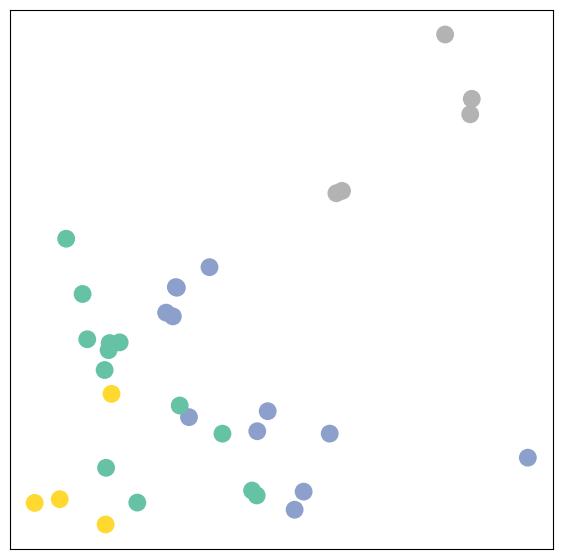

In [ ]:
model = GCN()

_, h = model(data.x, data.edge_index)
print(f'Embedding shape: {list(h.shape)}')

visualize(h, color=data.y)

In [ ]:
h.shape

torch.Size([34, 2])

Особенно примечателен тот факт, что даже до обучения весов нашей модели, мы получаем векторные представления, близко напоминающие структуру сообществ нашего графа.

Вершины одного цвета (сообщества) уже размещаются близко в пространстве эмбеддингов, несмотря на то, что веса нашей модели инициализированы **случайным образом** и мы не пытались ничего оптимизировать!

Данное наблюдение ведёт к умозаключению о том, что графовые нейронные сети вносят сильное индуктивное смещение, ведущее к тому, что мы получаем подобные векторные представления для близко размещённых вершин графа.

### Обучение на каратистах

Но можем ли мы сделать лучше? Посмотрим на пример того, как можно выучить параметры нашей сети, основываясь на известных данных о классе (сообществах) для 4 вершин (по одной на сообщество):

Раз уж всё в нашей модели дифференцируемо и параметризуемо, мы можем добавить несколько признаков и посмотреть, что произойдёт с эмбеддингами.

Здесь мы обратимся к обучению с частичным привлечением учителя (semi-supervised learning) или трансдуктивной процедуре: просто тренируем на данных, содержащих по одному примеру на класс, при этом используя всю информацию о связности вершин.

Обучение нашей модели очень похоже на таковое для любой модели в PyTorch. В дополнение к архитектуре сети, мы также задаём функцию потерь (в данном случае, [`CrossEntropyLoss`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html)), а также - оптимизатор (в данном случае - один из вариантов стохастического градиентного спуска, [`Adam`](https://pytorch.org/docs/stable/optim.html?highlight=adam#torch.optim.Adam)).

Затем проводим несколько итераций оптимизации, состоящих из прямого и обратного прохода для вычисления градиентов параметров нашей модели относительно функции потерь, вычисленной во время прямого прохода. Если вам знаком PyTorch, данная схема уже привычна. В любом случае, документация PyTorch содержит [хорошее руководство по основам тренировки нейронных сетей в PyTorch](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#define-a-loss-function-and-optimizer).

Обратите внимание, что наш сценарий обучения с частичным привлением учителя реализуется следующей конструкцией:
```
loss = criterion(out[data.train_mask], data.y[data.train_mask])
```
В то время как мы вычисляем векторные представления для всех вершин, **лишь только размеченные используются для вычисления функции потерь**.

Здесь это реализуется фильтрацией выхода классификатора `out` и предварительно известными классами вершин `data.y` таким образом, чтобы учитывать только те из них, которые содержатся в `train_mask`.

Приступим же к обучению и посмотрим как наши эмбеддинги эволюционируют (для этого лучше всего запустить код):

<IPython.core.display.Javascript object>

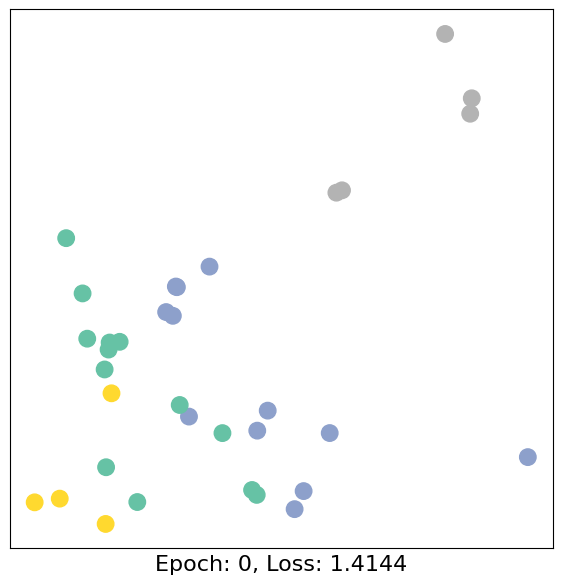

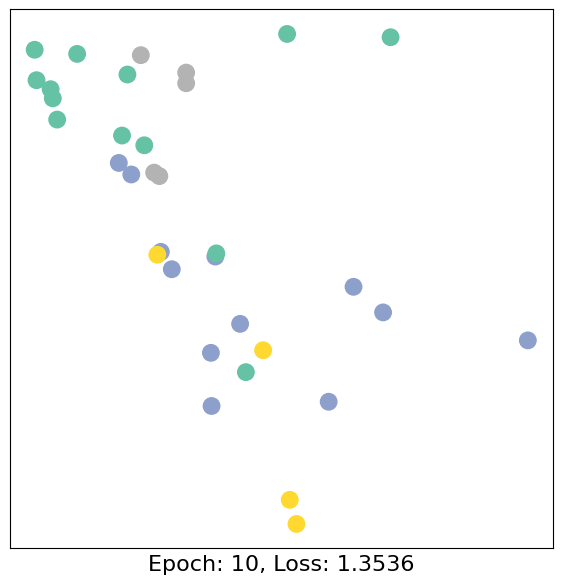

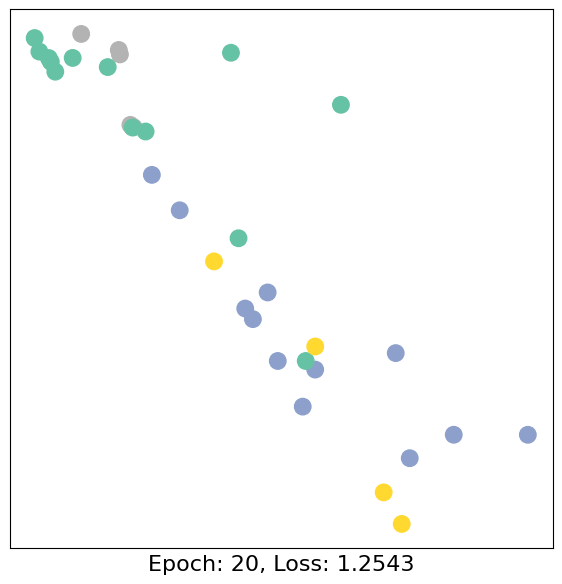

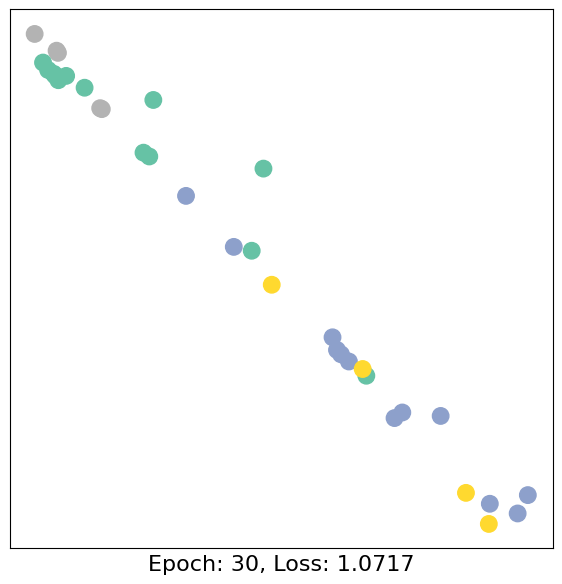

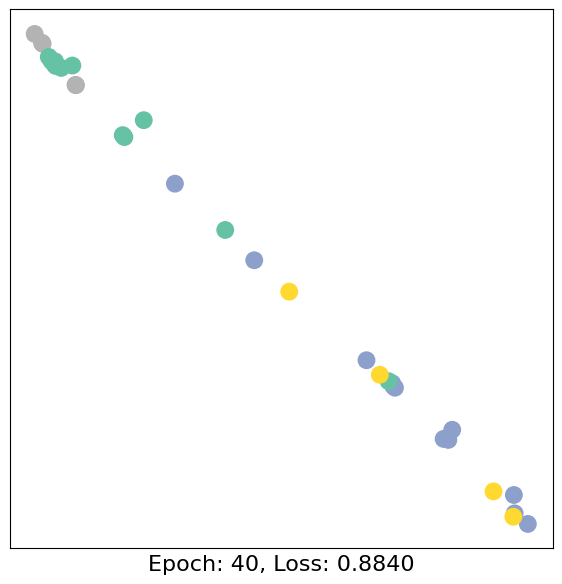

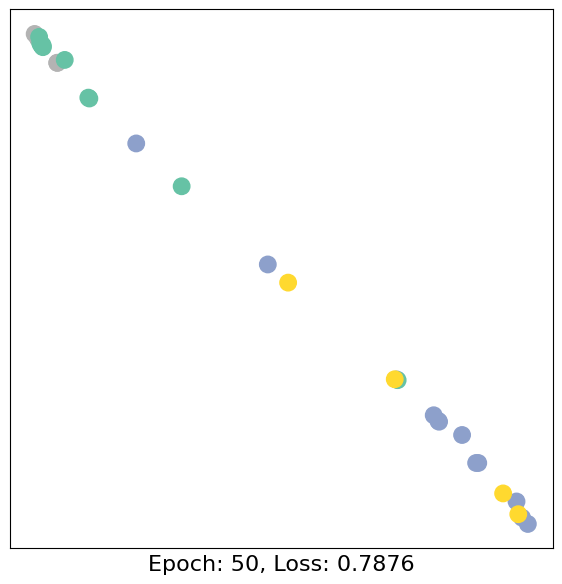

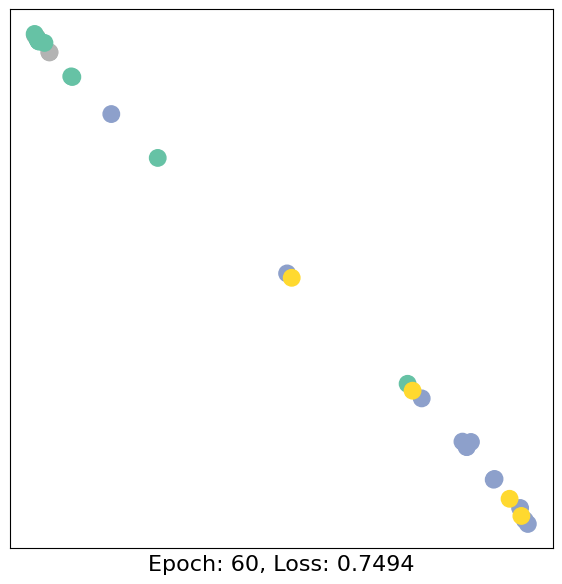

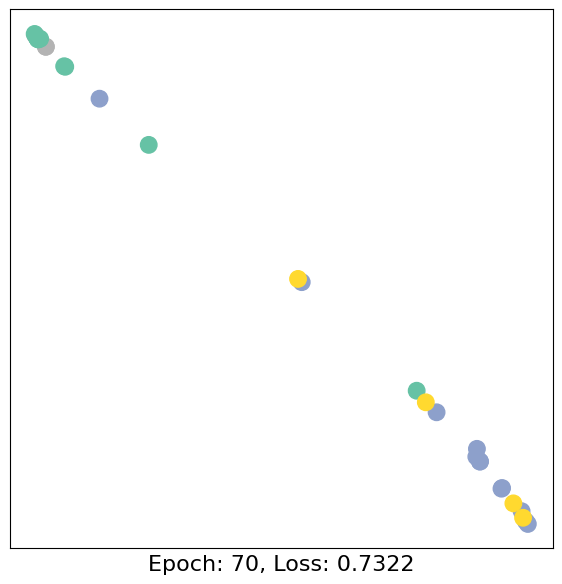

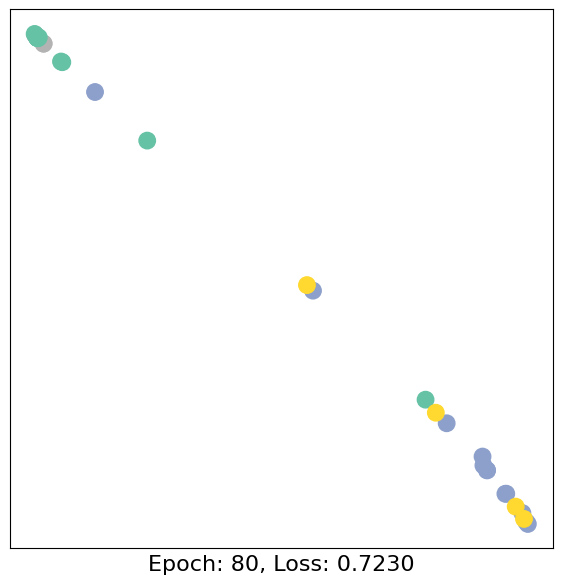

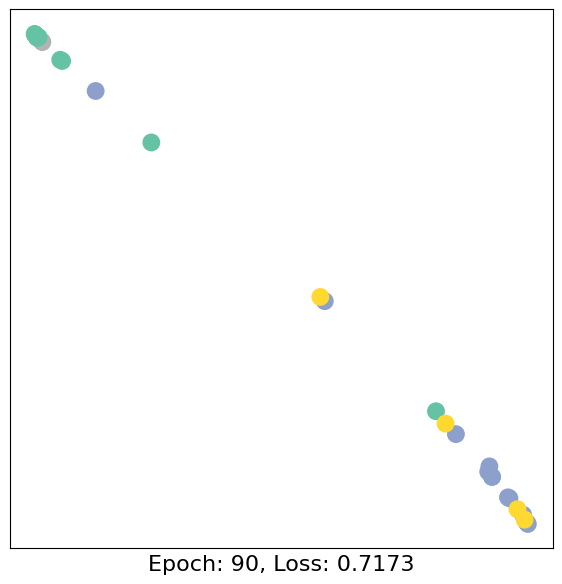

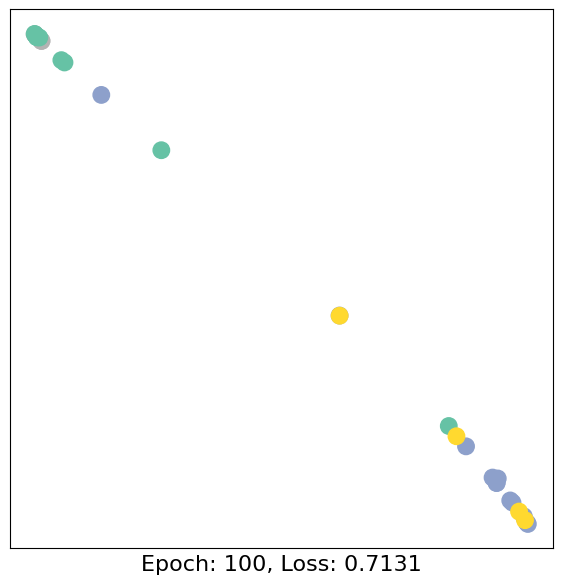

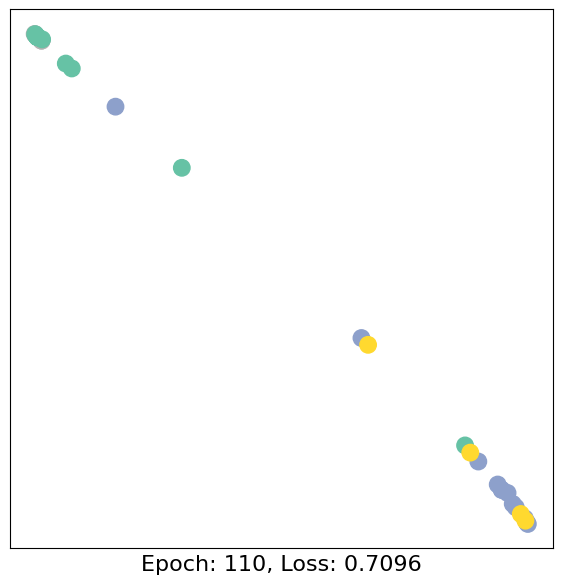

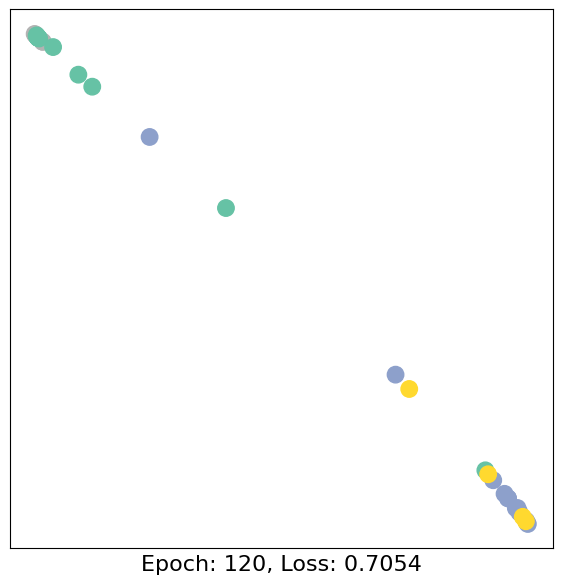

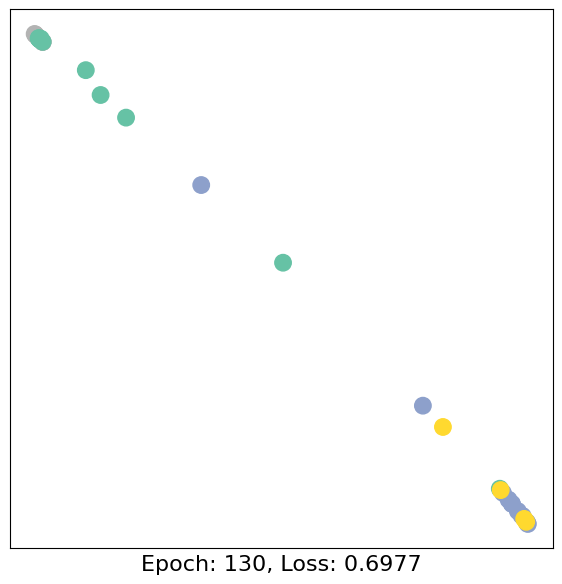

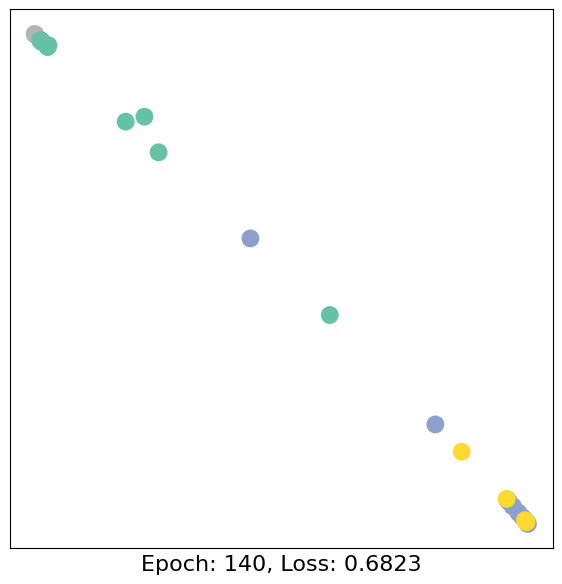

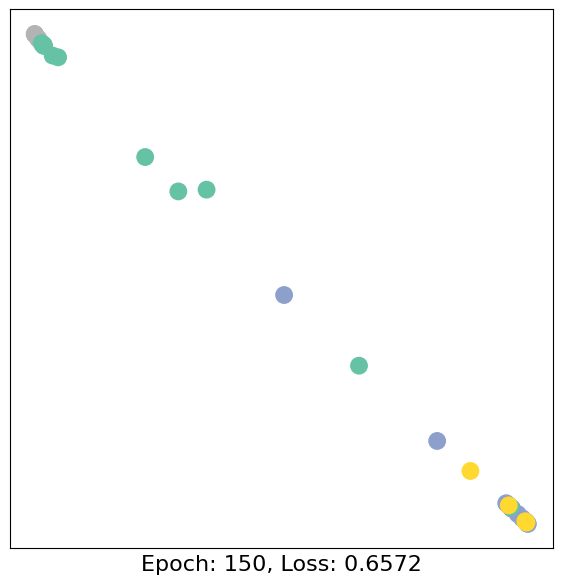

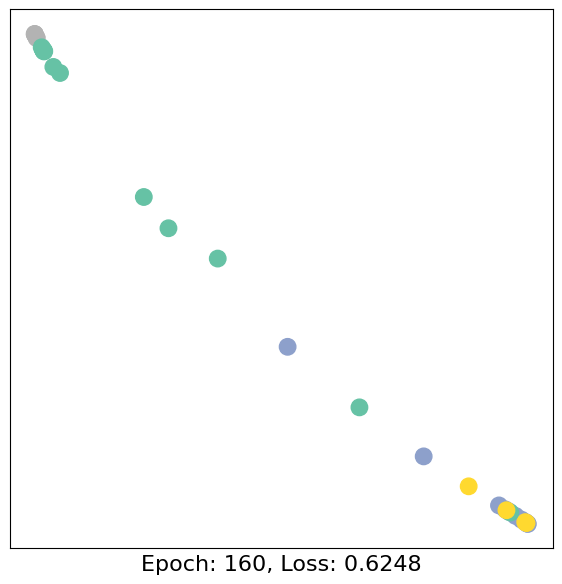

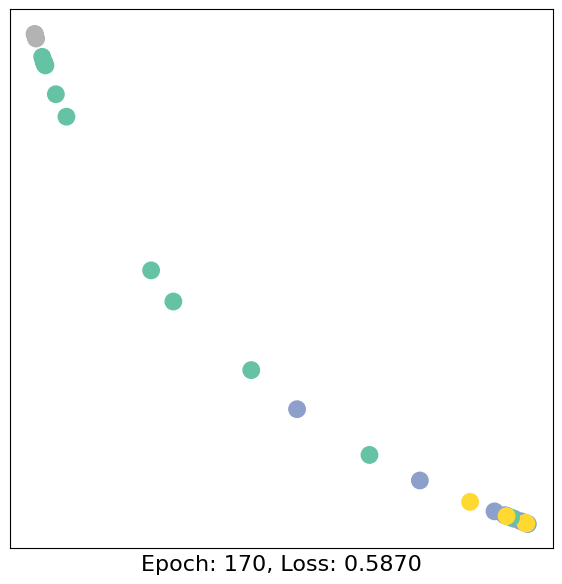

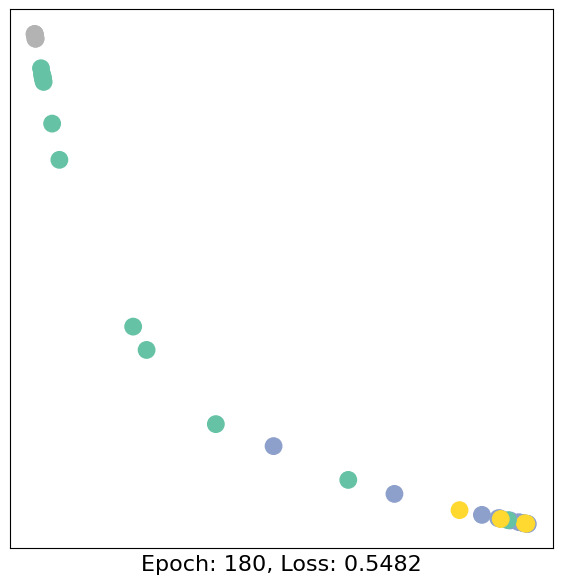

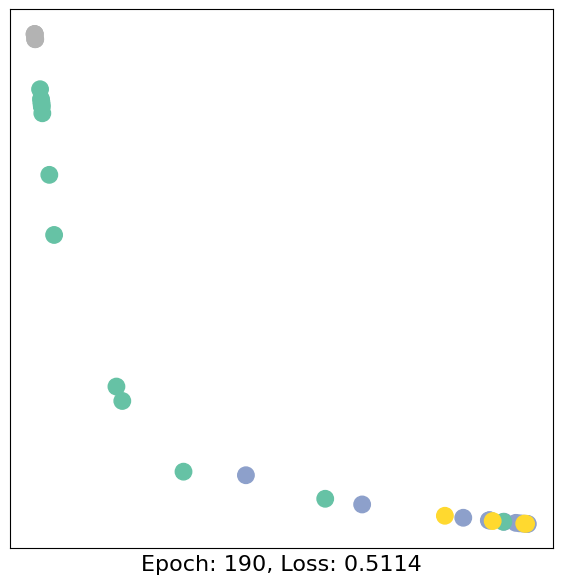

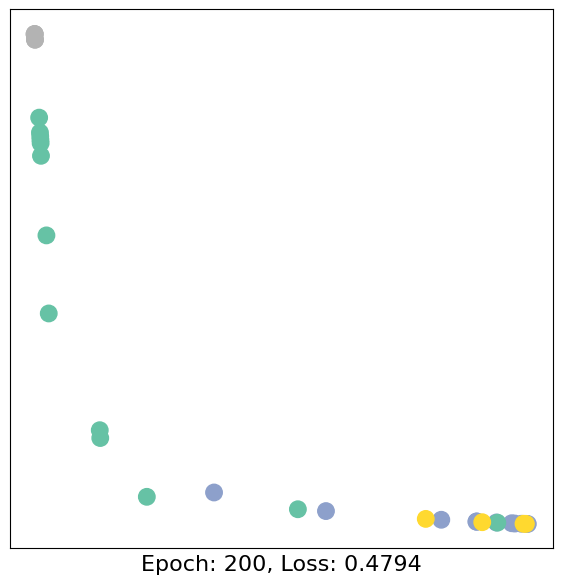

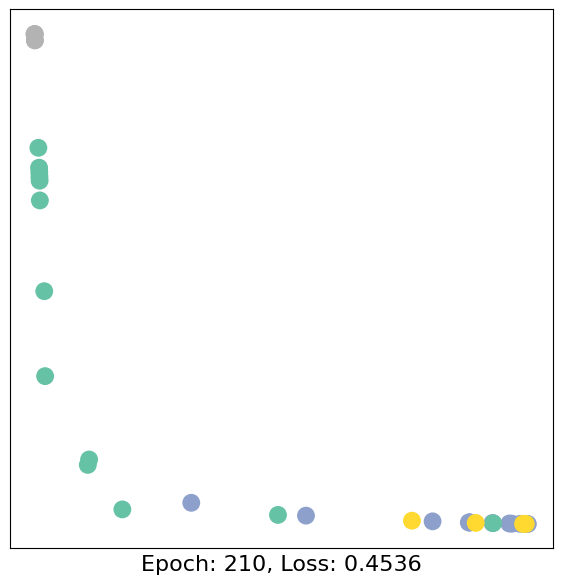

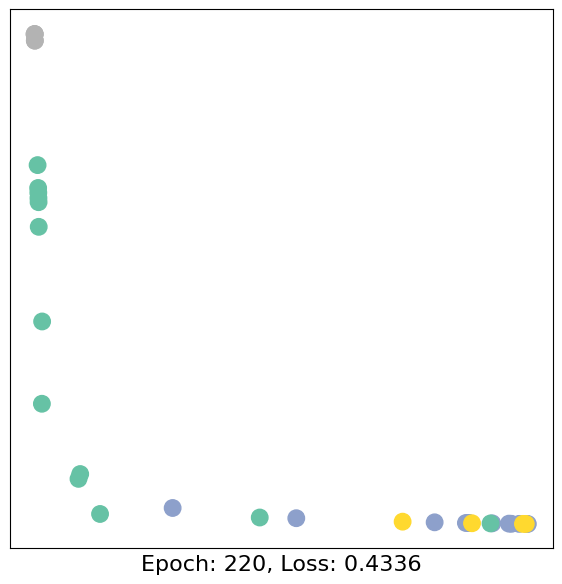

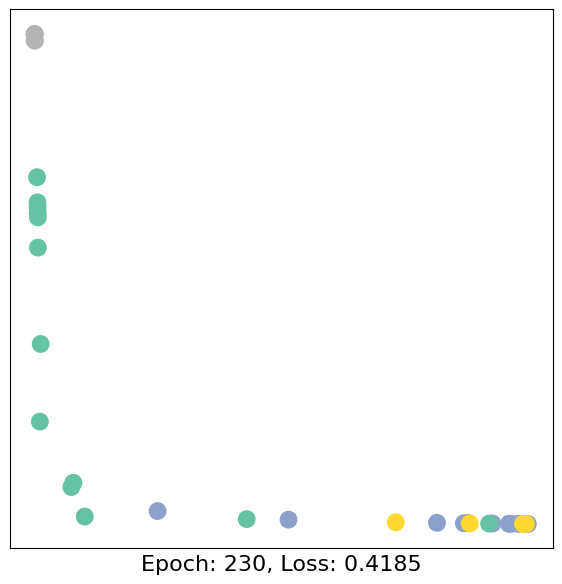

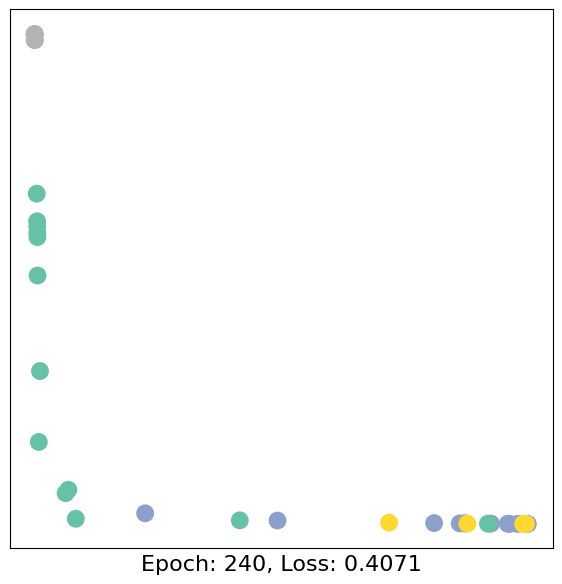

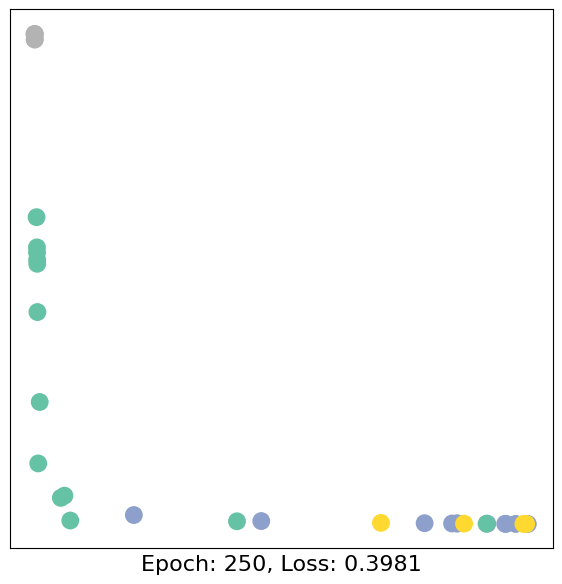

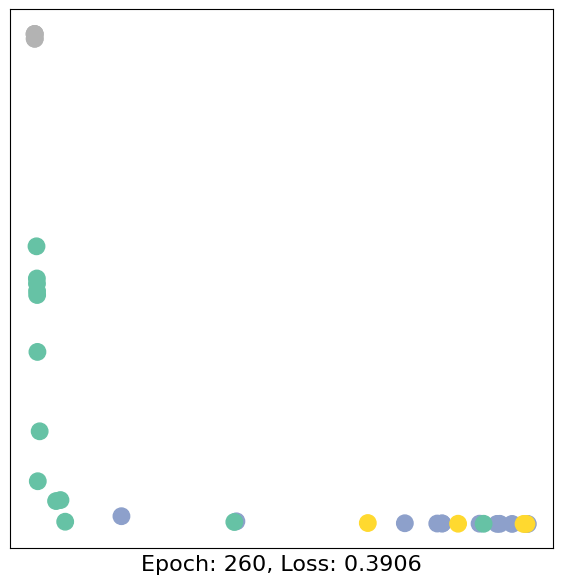

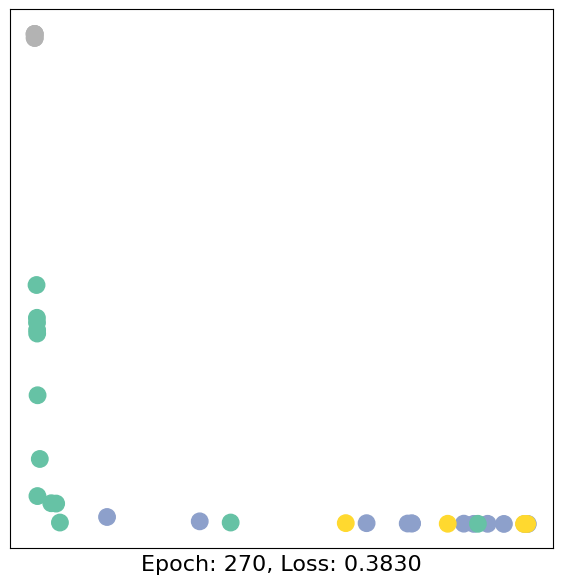

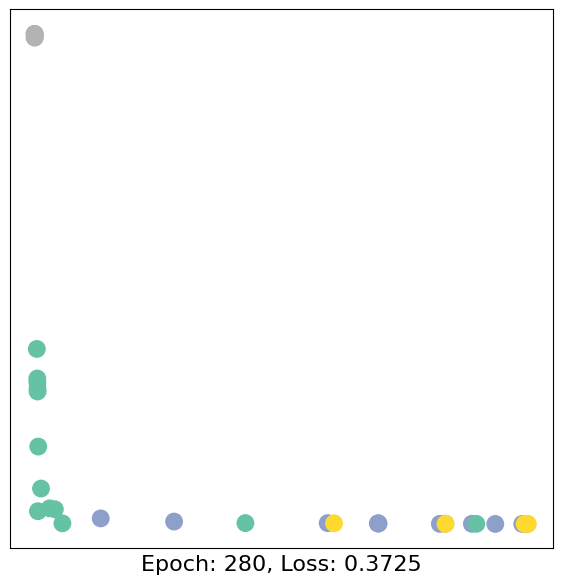

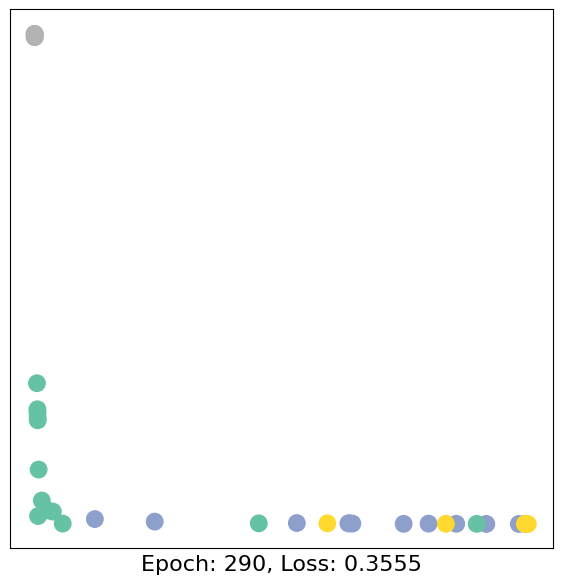

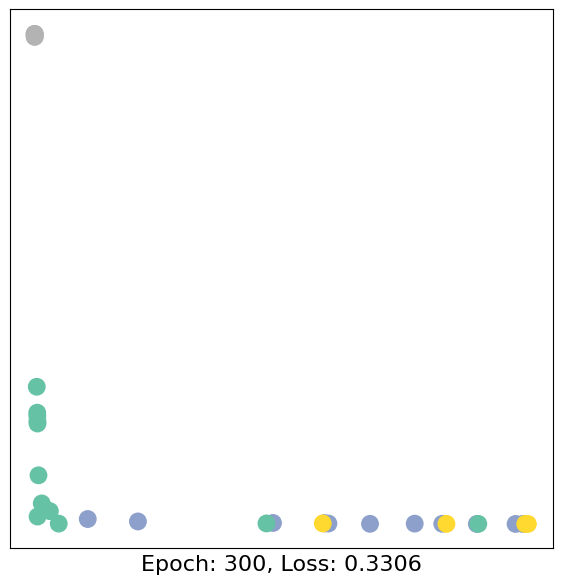

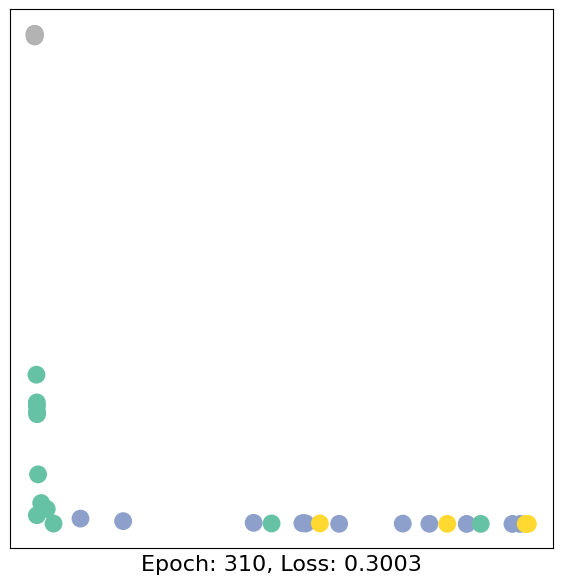

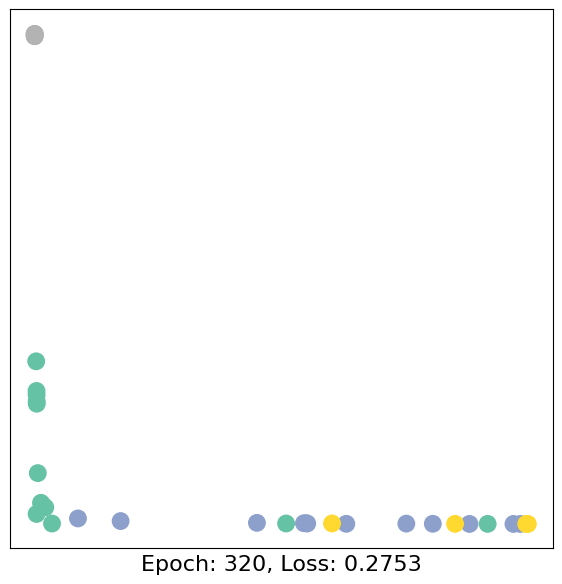

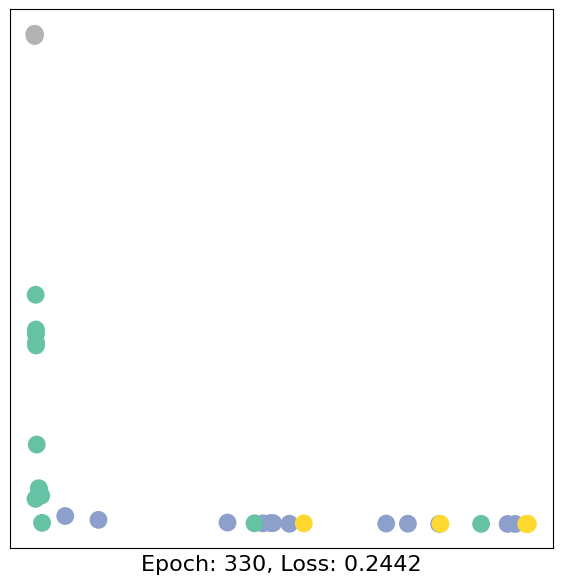

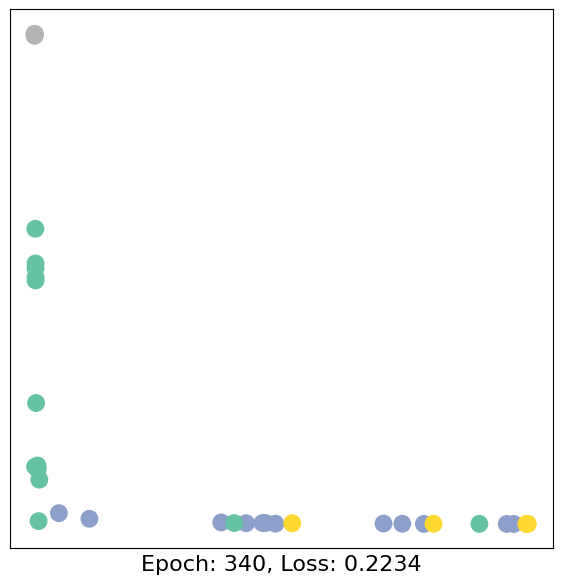

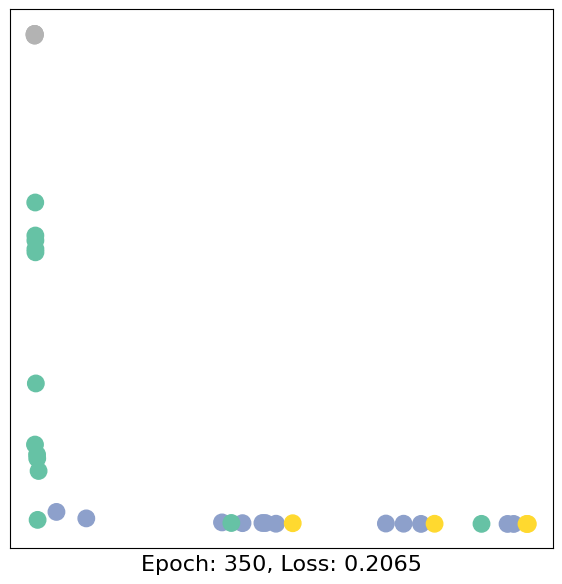

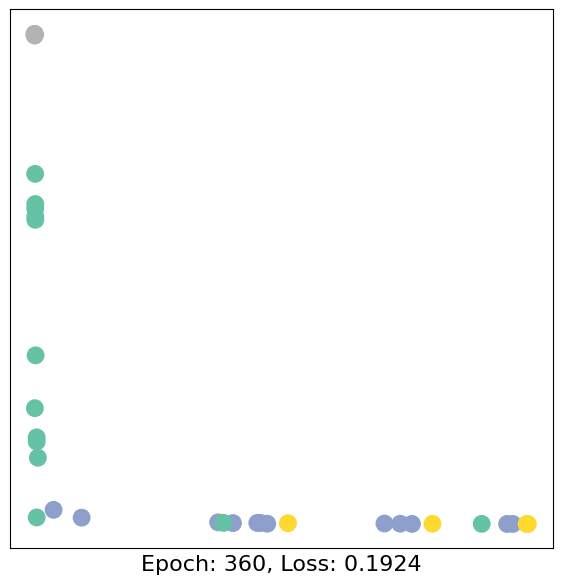

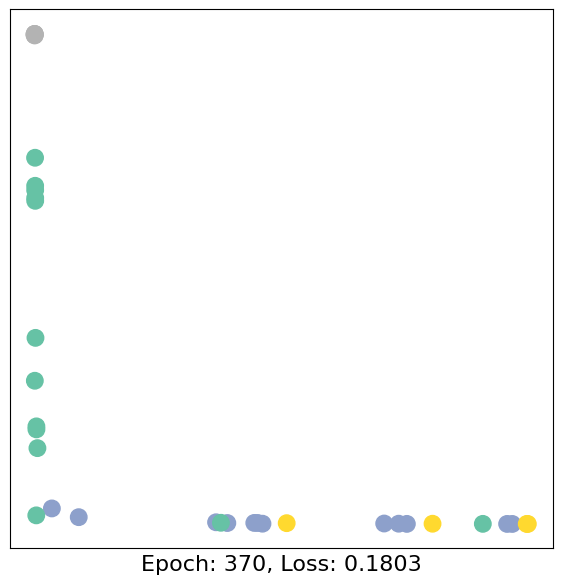

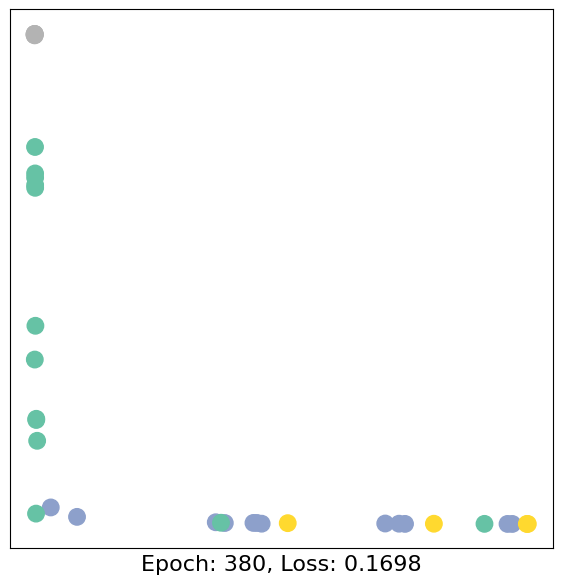

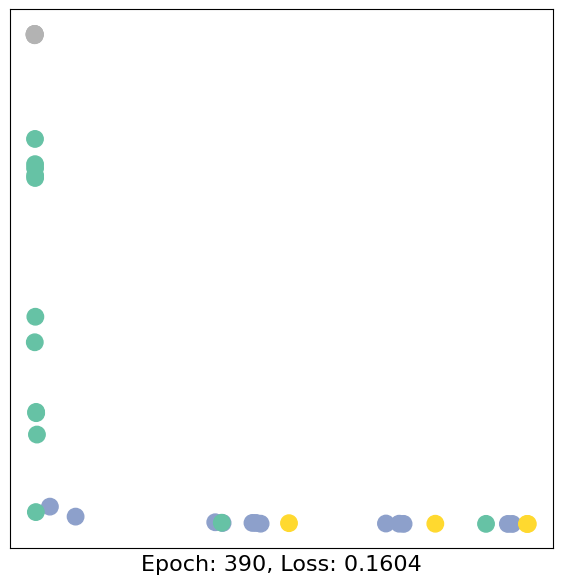

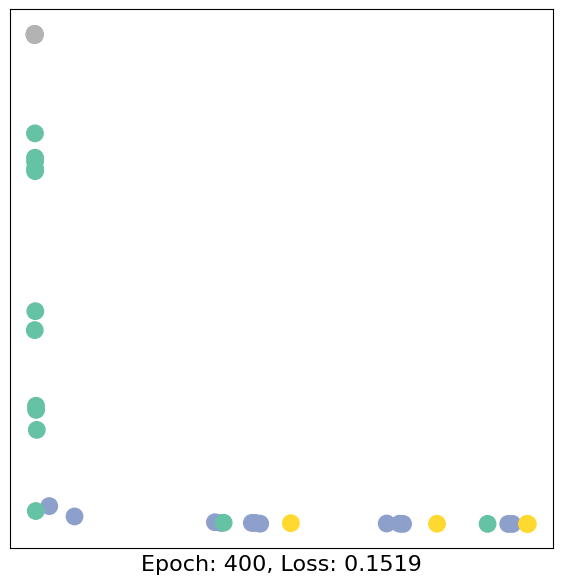

In [ ]:
import time
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 430})'''))

model = GCN()
criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  # Define optimizer.

def train(data):
    optimizer.zero_grad()  # Clear gradients.
    out, h = model(data.x, data.edge_index)  # Perform a single forward pass.
    loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
    loss.backward()  # Derive gradients.
    optimizer.step()  # Update parameters based on gradients.
    return loss, h, out

for epoch in range(401):
    loss, h, out = train(data)
    # Visualize the node embeddings every 10 epochs
    if epoch % 10 == 0:
        visualize(h, color=data.y, epoch=epoch, loss=loss)
        time.sleep(0.3)

In [ ]:
predict = torch.argmax(out, axis=1)
print(torch.sum(predict==data.y)/len(predict))

tensor(0.5882)


Как видим, наша 3-слойная графовая свёрточная сеть способна линейно разделить сообщества и корректно классифицировать большинство вершин.

Более того, мы произвели необходимые вычисления всего за несколько строк кода благодаря библиотеке PyTorch Geometric, которая помогла с обработкой данных и реализациями графовых нейронных сетей.


# Custom GCNConv

$ \mathbf{x}_i^{(k)} = \sum_{j \in \mathcal{N}(i) \cup \{ i \}} \frac{1}{\sqrt{\deg(i)} \cdot \sqrt{\deg(j)}} \cdot \left( \mathbf{W}^{\top} \cdot \mathbf{x}_j^{(k-1)} \right) + \mathbf{b},\\ $

1. Add self-loops to the adjacency matrix.

2. Linearly transform node feature matrix.

3.  Compute normalization coefficients.

4. Normalize node features in
.

5. Sum up neighboring node features ("add" aggregation).

6. Apply a final bias vector.

In [ ]:
import torch
from torch.nn import Linear, Parameter
from torch_geometric.nn import MessagePassing
from torch_geometric.utils import add_self_loops, degree
import pdb;


class GCNConv(MessagePassing):
    def __init__(self, in_channels, out_channels):
        super().__init__(aggr='add')  # "Add" aggregation (Step 5).
        self.lin = Linear(in_channels, out_channels, bias=False)
        self.bias = Parameter(torch.empty(out_channels))

        self.reset_parameters()

    def reset_parameters(self):
        self.lin.reset_parameters()
        self.bias.data.zero_()

    def forward(self, x, edge_index):
        # x has shape [N, in_channels]
        # edge_index has shape [2, E]

        # Step 1: Add self-loops to the adjacency matrix.
        edge_index, _ = add_self_loops(edge_index, num_nodes=x.size(0))

        # Step 2: Linearly transform node feature matrix.
        x = self.lin(x)

        # Step 3: Compute normalization.
        row, col = edge_index
        deg = degree(col, x.size(0), dtype=x.dtype) #len x
        deg_inv_sqrt = deg.pow(-0.5)
        deg_inv_sqrt[deg_inv_sqrt == float('inf')] = 0
        norm = deg_inv_sqrt[row] * deg_inv_sqrt[col]

        # Step 4-5: Start propagating messages.
        out = self.propagate(edge_index, x=x, norm=norm)

        # Step 6: Apply a final bias vector.
        out += self.bias

        return out

    def message(self, x_j, norm):
        # x_j has shape [E, out_channels]
        # Step 4: Normalize node features.
        return norm.view(-1, 1) * x_j

In [ ]:
import torch
from torch.nn import Linear
#from torch_geometric.nn import GCNConv


class GCN_custom(torch.nn.Module):
    def __init__(self):
        super().__init__()
        torch.manual_seed(12345)
        self.conv1 = GCNConv(dataset.num_features, 4)
        self.conv2 = GCNConv(4, 4)
        self.conv3 = GCNConv(4, 2)
        self.classifier = Linear(2, dataset.num_classes)

    def forward(self, x, edge_index):
        h = self.conv1(x, edge_index)
        h = h.tanh()
        h = self.conv2(h, edge_index)
        h = h.tanh()
        h = self.conv3(h, edge_index)
        h = h.tanh()  # Final GNN embedding space.

        # Apply a final (linear) classifier.
        out = self.classifier(h)

        return out, h

model = GCN_custom()
print(model)

GCN_custom(
  (conv1): GCNConv()
  (conv2): GCNConv()
  (conv3): GCNConv()
  (classifier): Linear(in_features=2, out_features=4, bias=True)
)


Embedding shape: [34, 2]


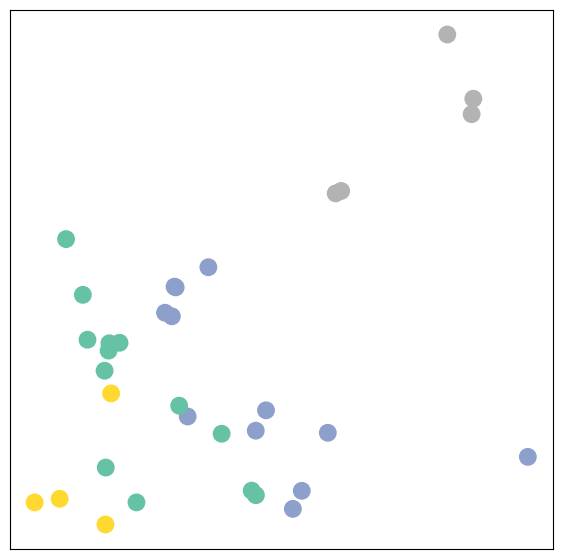

In [ ]:
model = GCN_custom()

_, h = model(data.x, data.edge_index)
print(f'Embedding shape: {list(h.shape)}')

visualize(h, color=data.y)

<IPython.core.display.Javascript object>

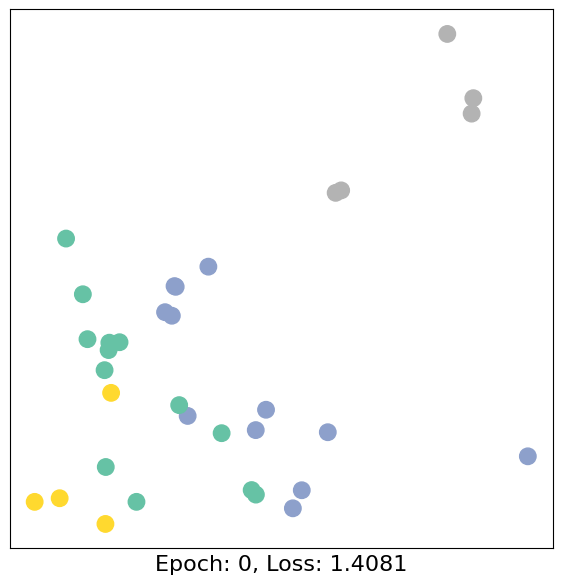

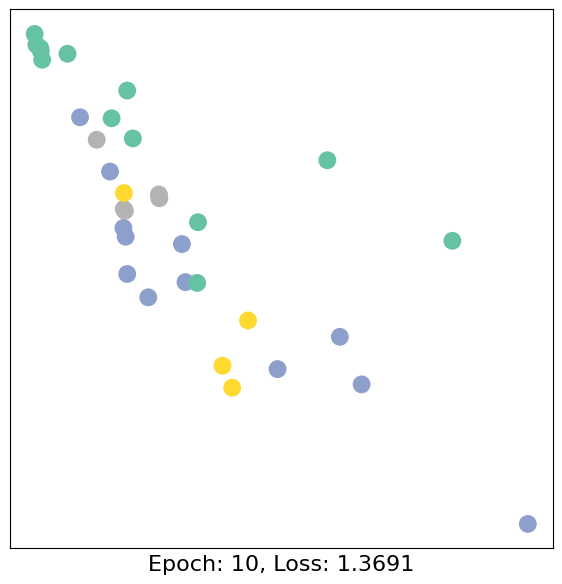

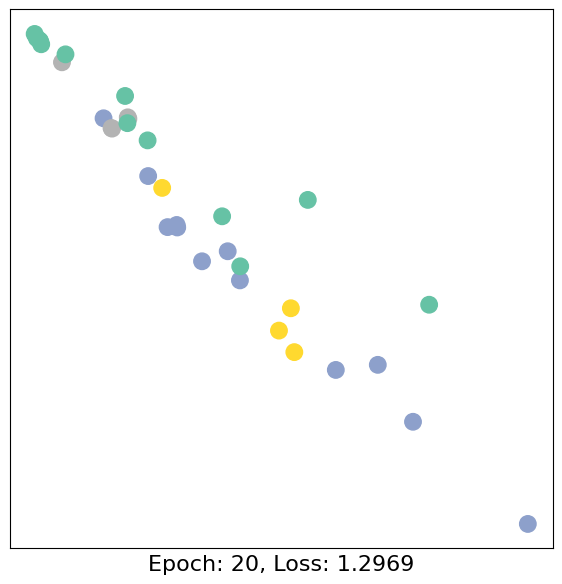

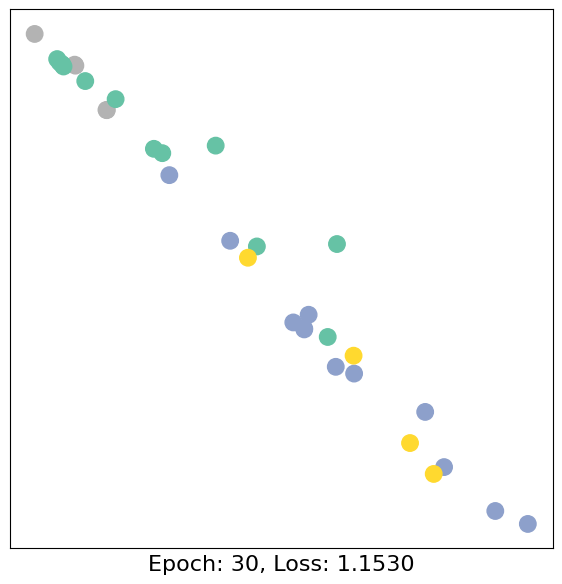

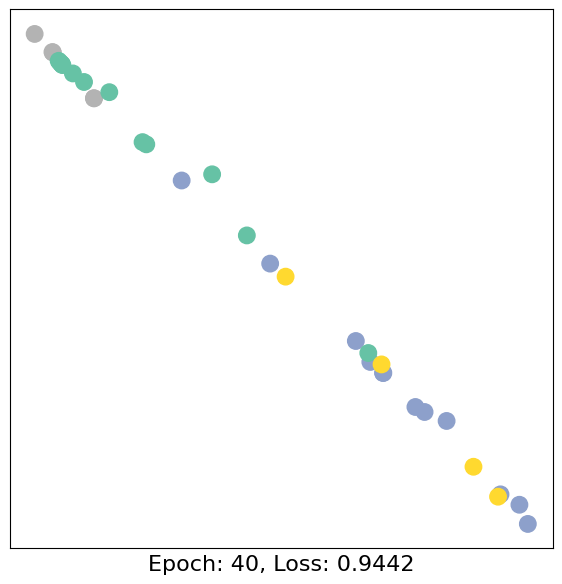

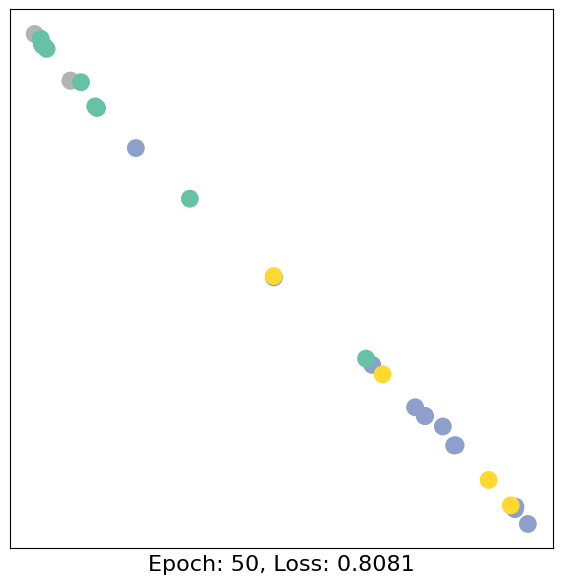

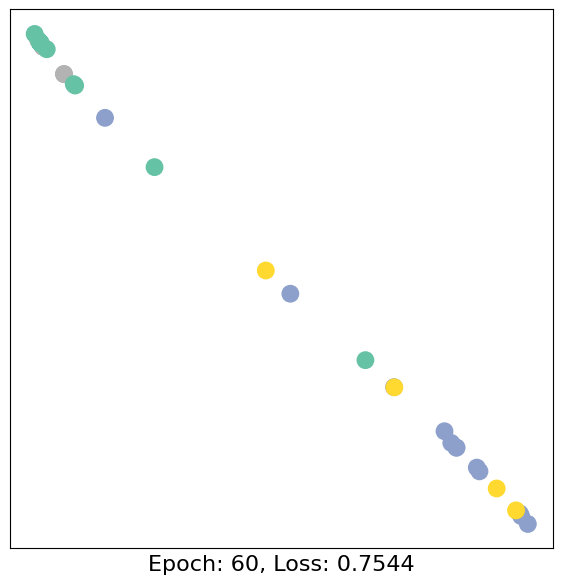

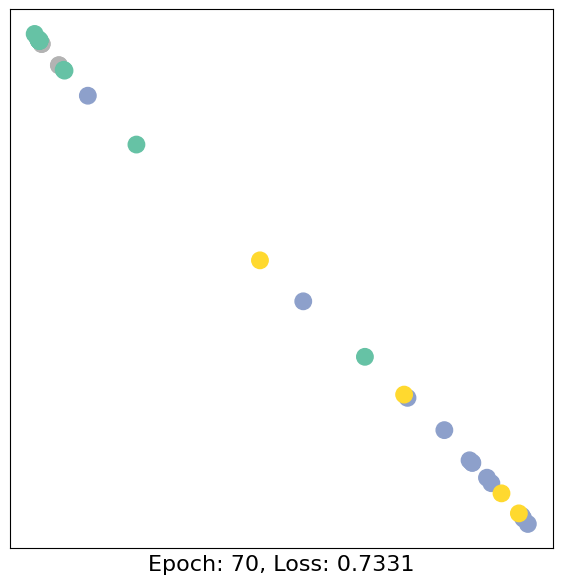

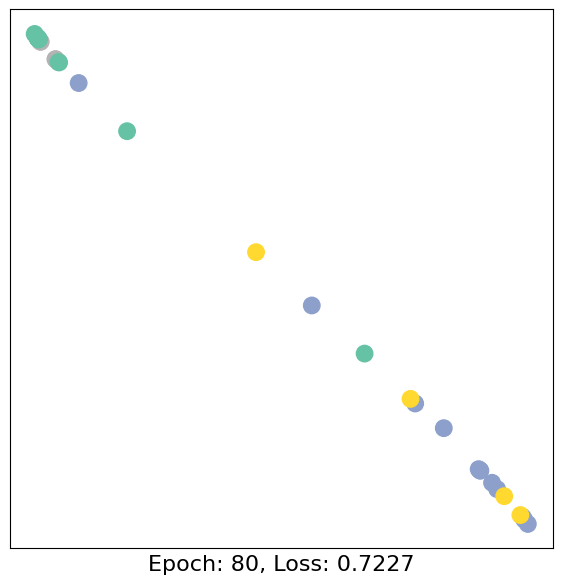

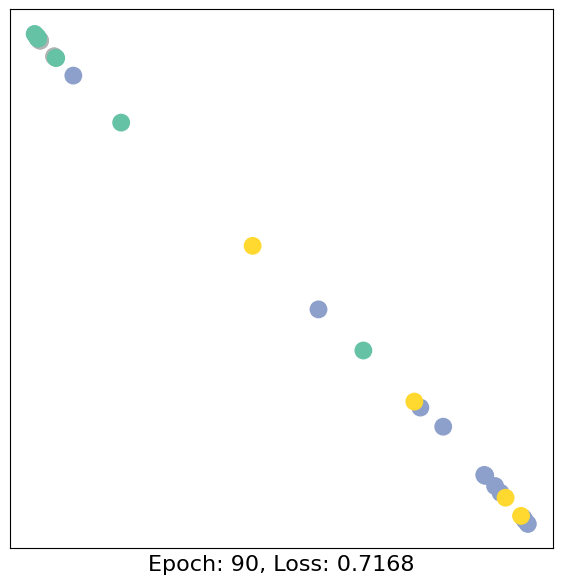

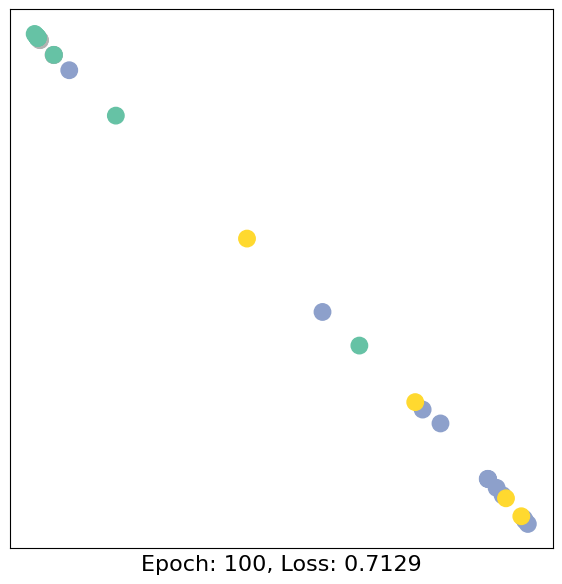

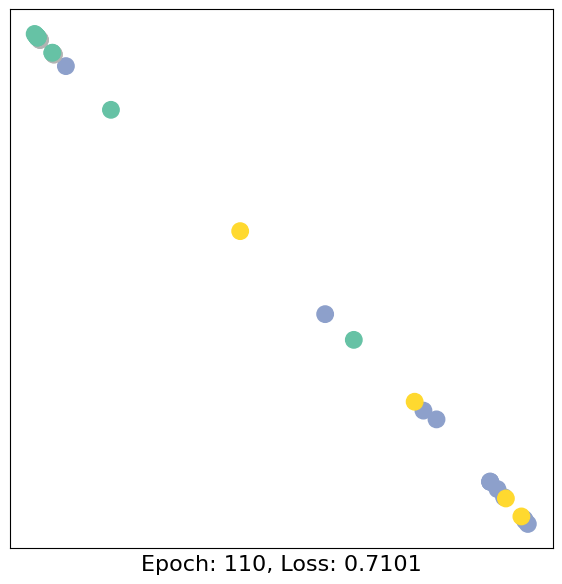

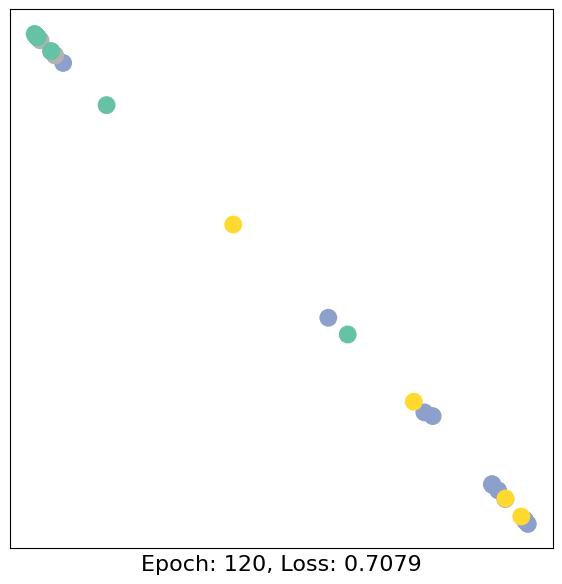

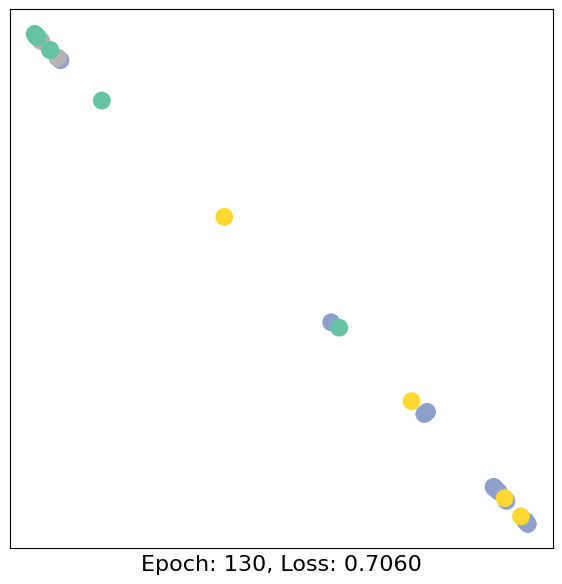

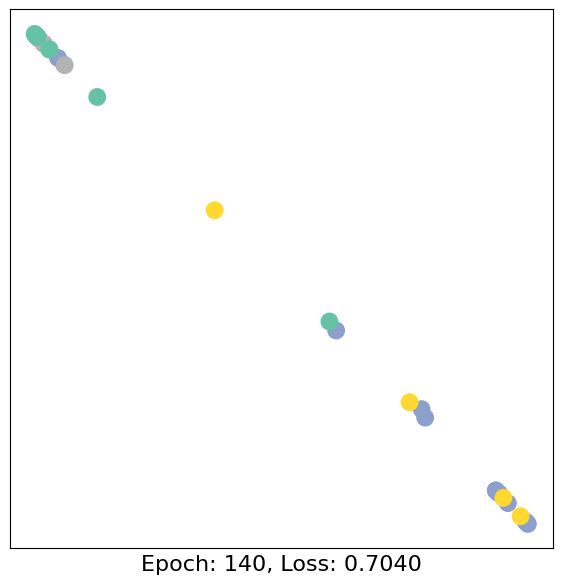

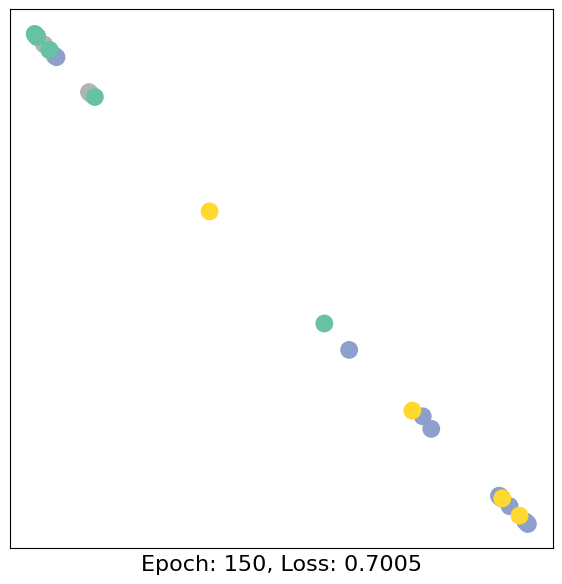

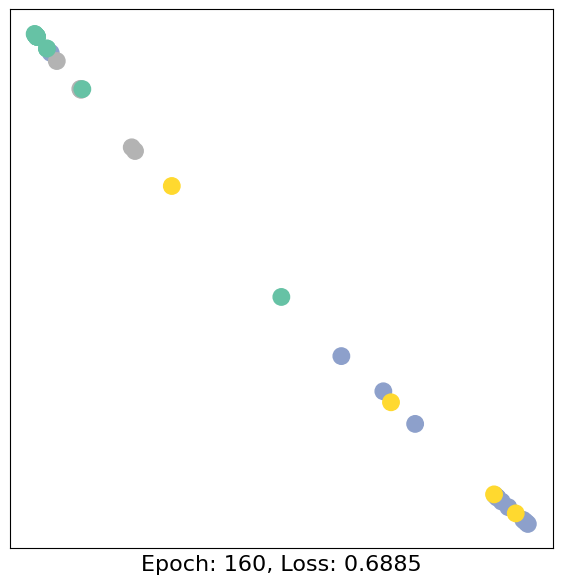

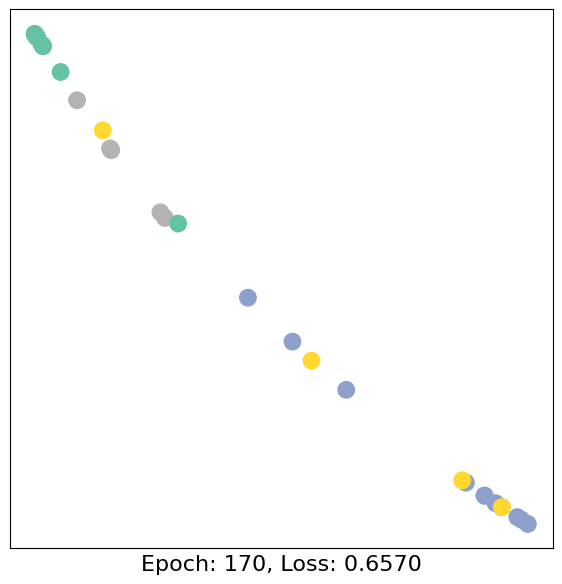

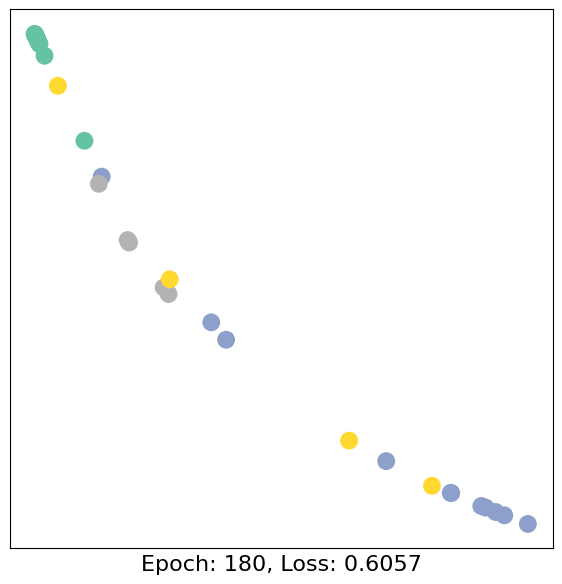

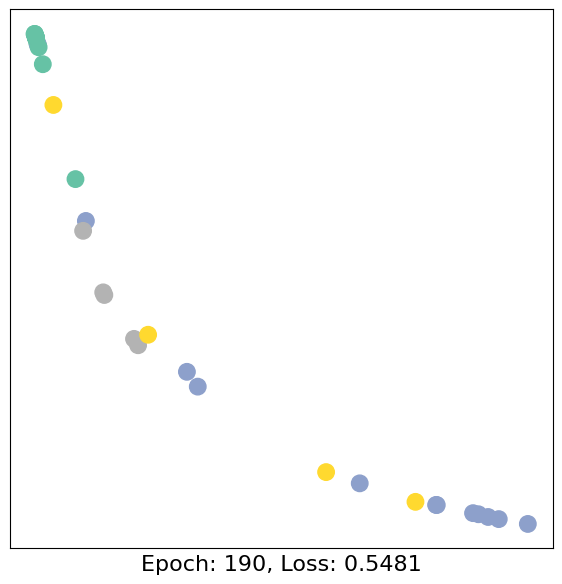

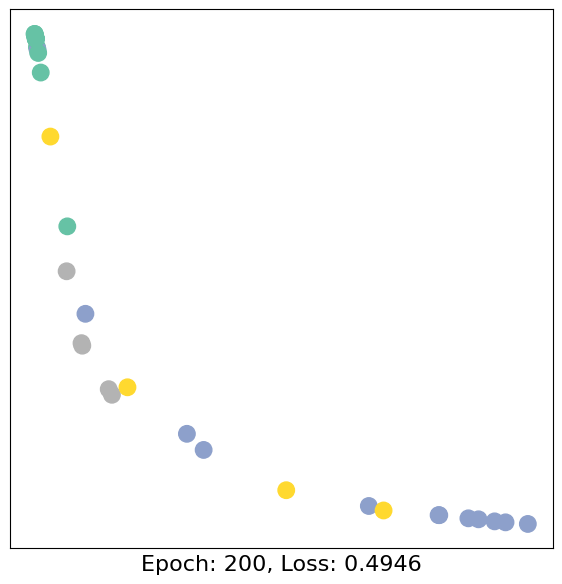

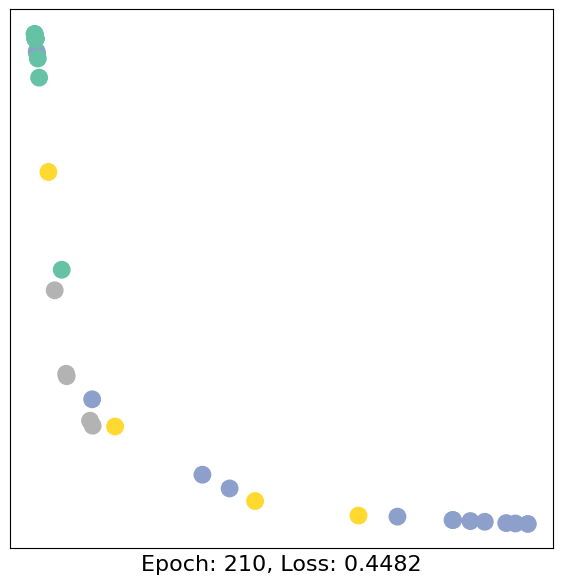

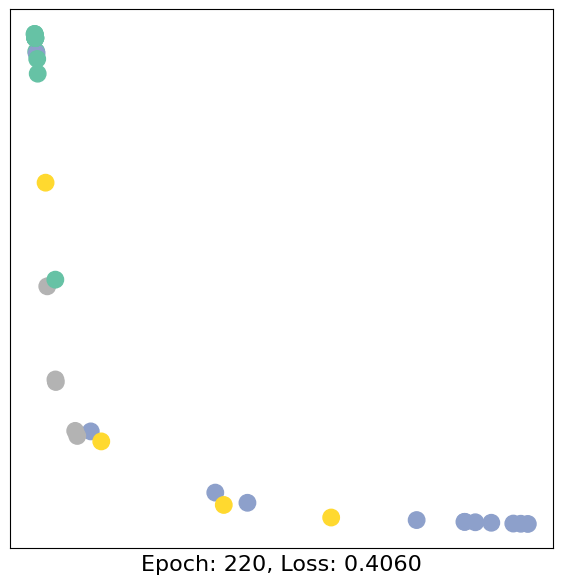

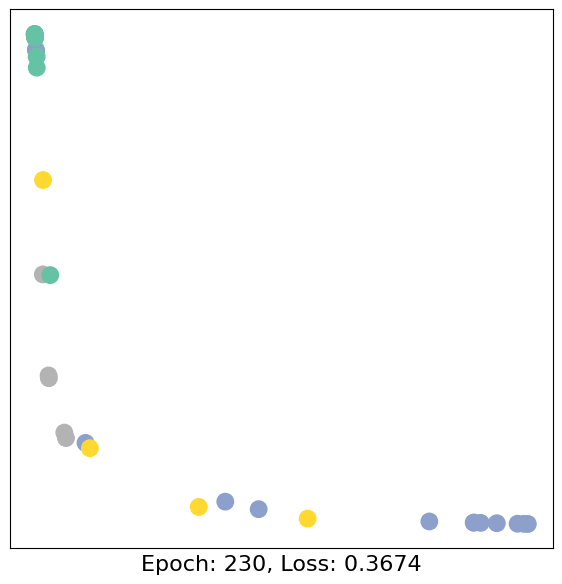

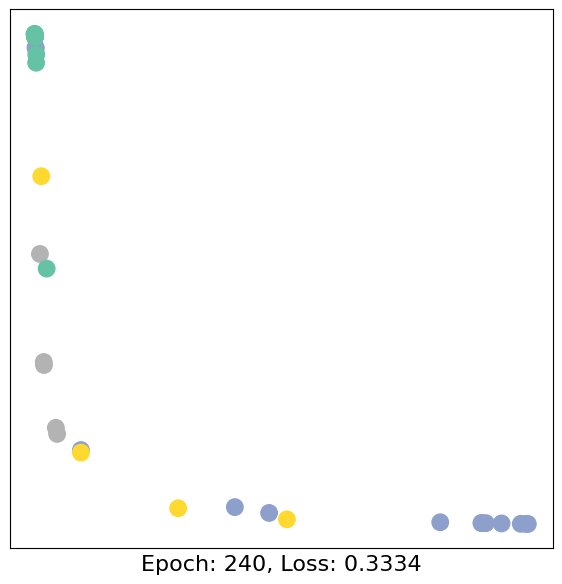

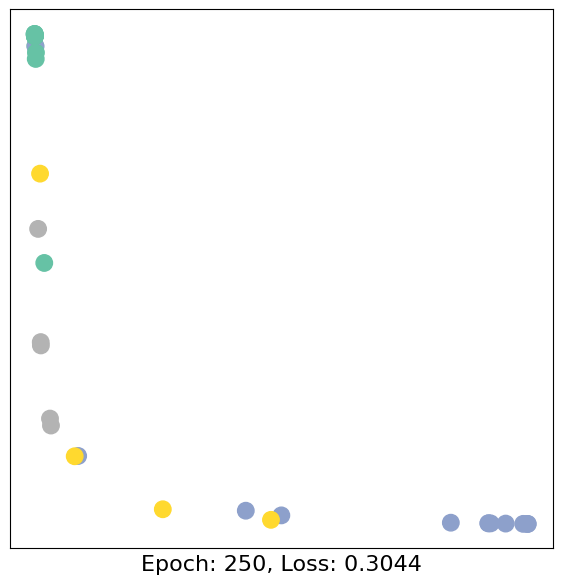

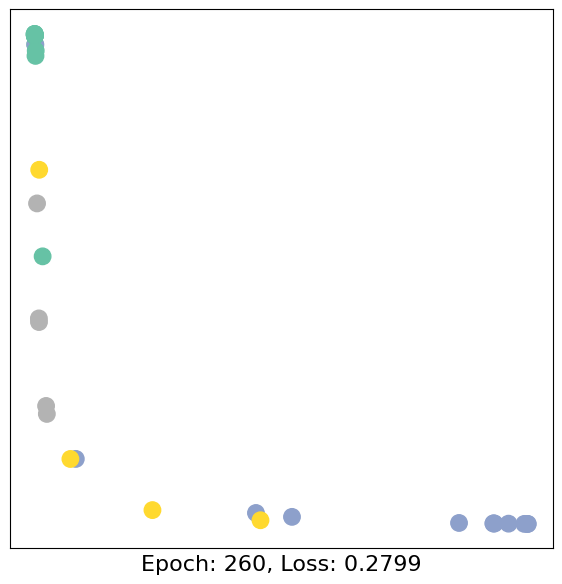

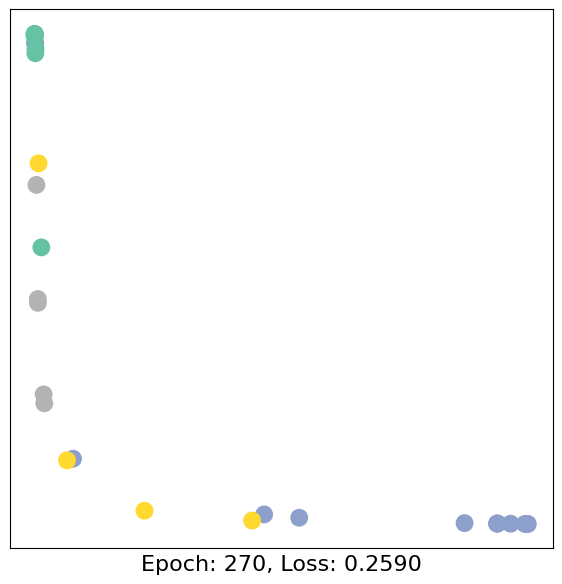

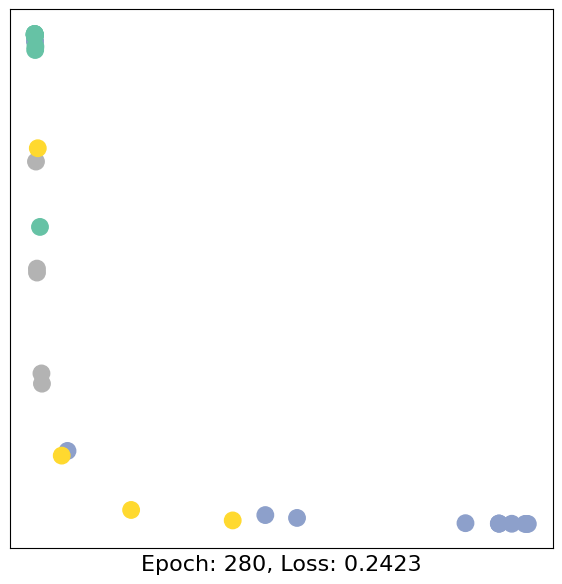

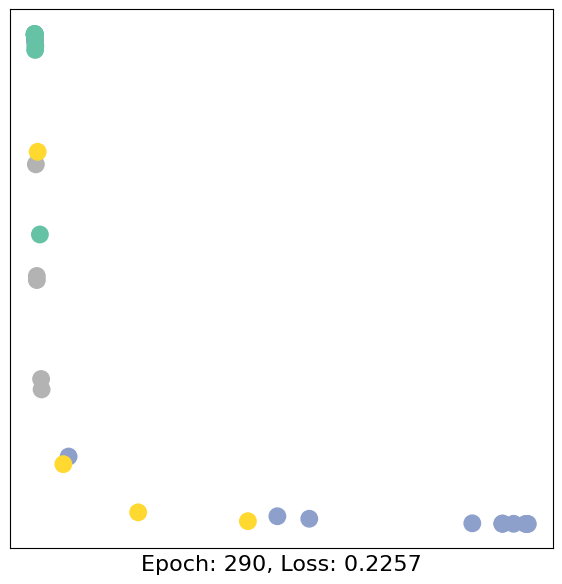

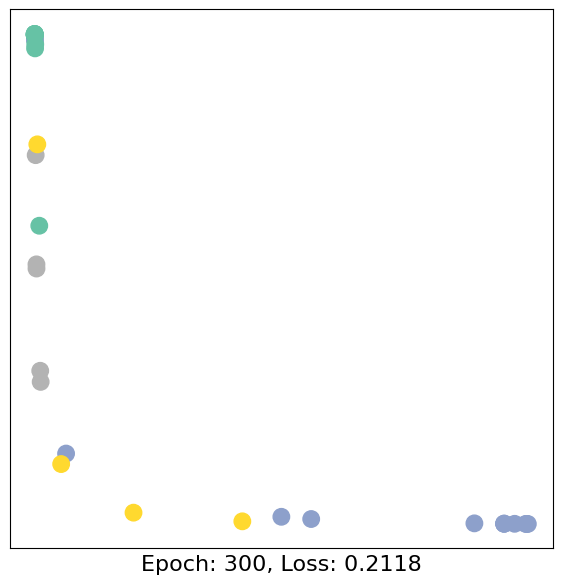

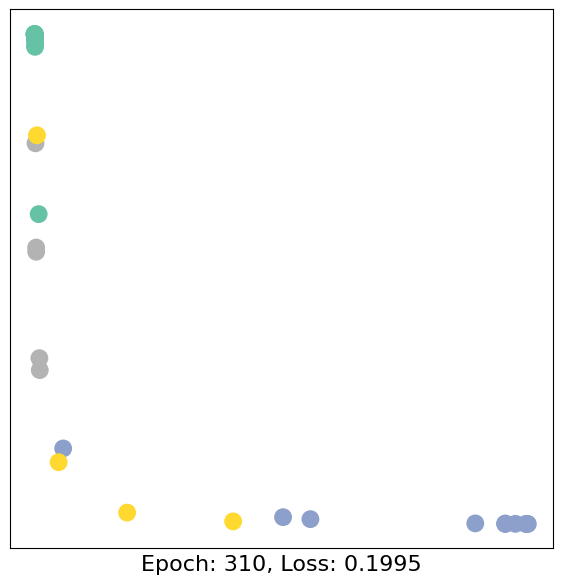

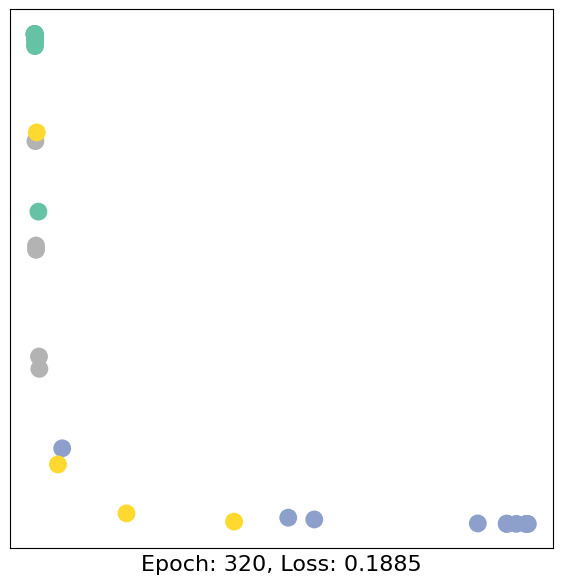

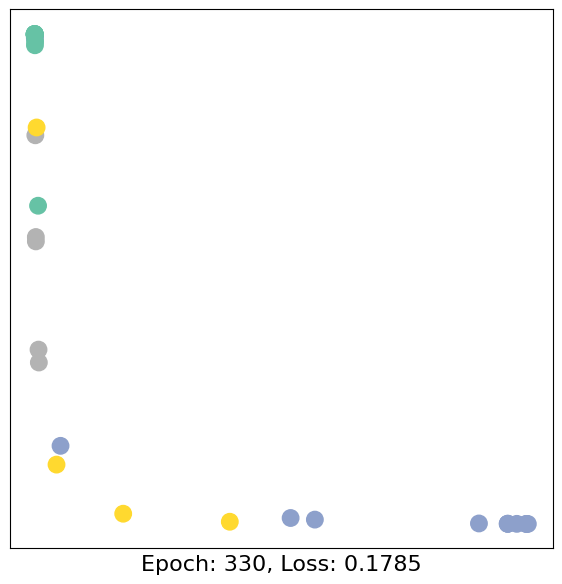

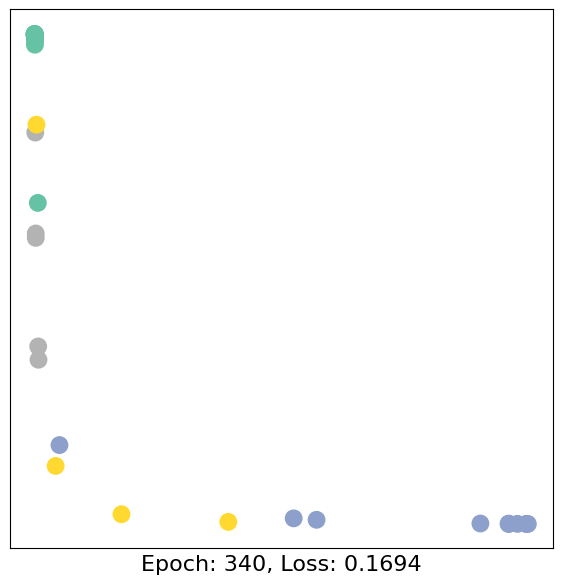

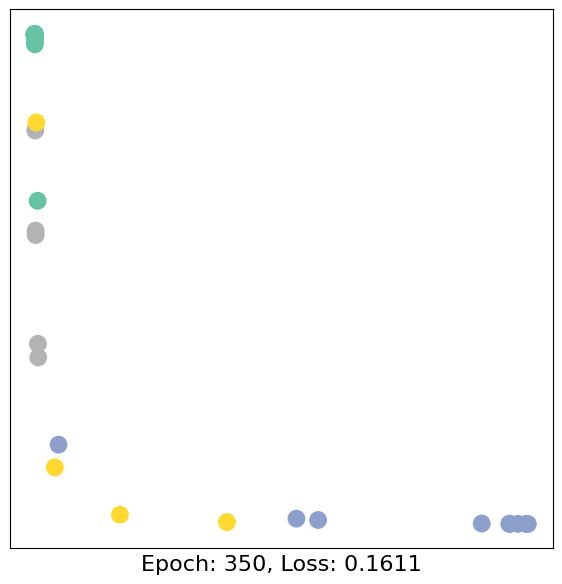

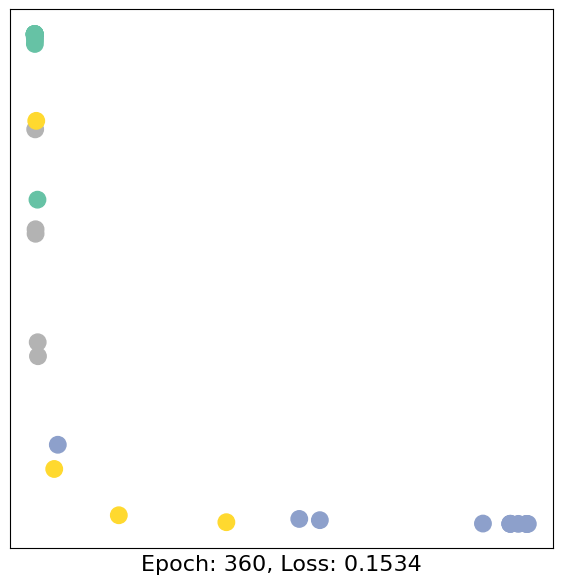

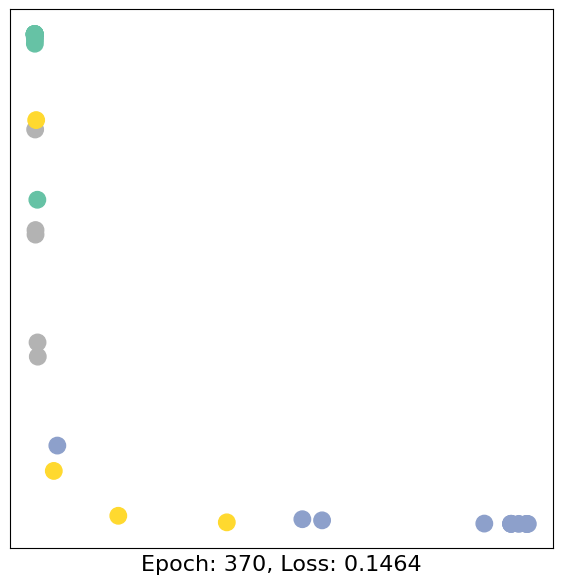

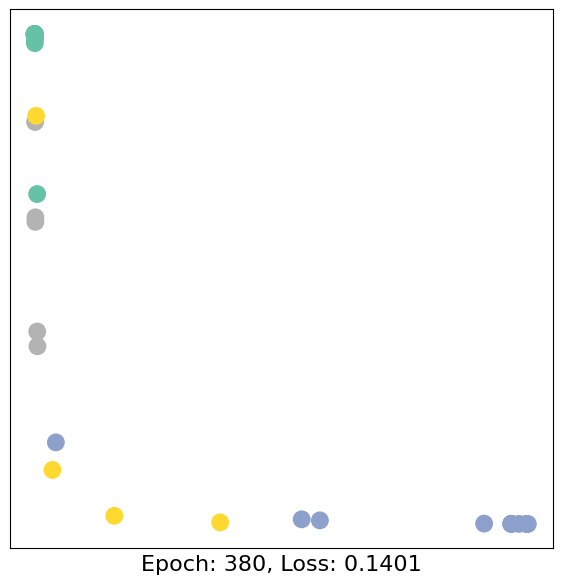

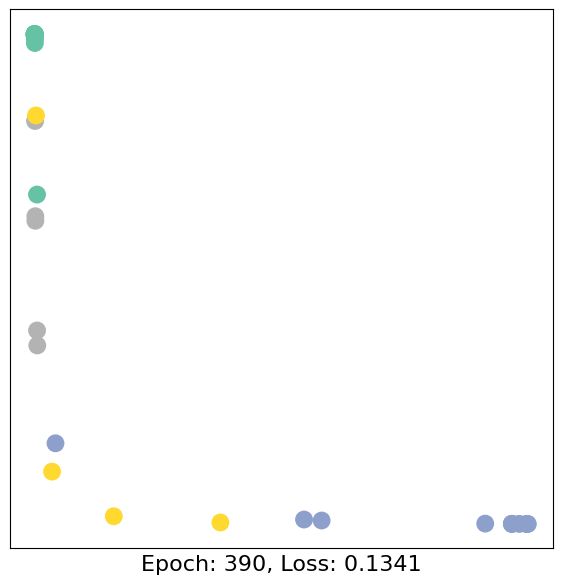

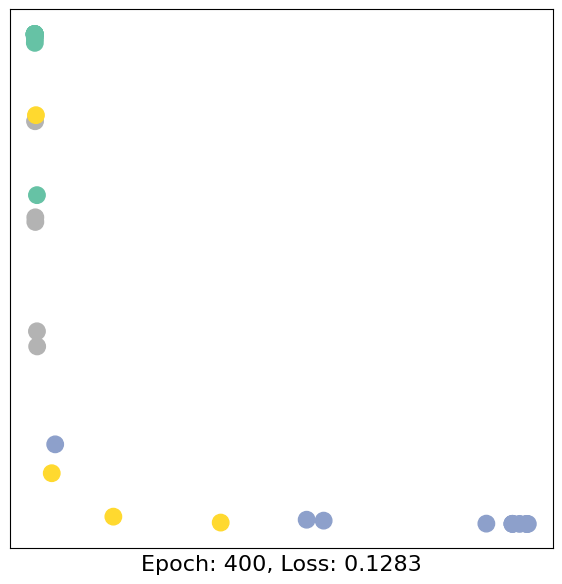

In [ ]:
import time
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 430})'''))

model = GCN_custom()
criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  # Define optimizer.

def train(data):
    optimizer.zero_grad()  # Clear gradients.
    out, h = model(data.x, data.edge_index)  # Perform a single forward pass.
    loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
    loss.backward()  # Derive gradients.
    optimizer.step()  # Update parameters based on gradients.
    return loss, h, out

for epoch in range(401):
    loss, h, out = train(data)
    # Visualize the node embeddings every 10 epochs
    if epoch % 10 == 0:
        visualize(h, color=data.y, epoch=epoch, loss=loss)
        time.sleep(0.3)

In [ ]:
predict = torch.argmax(out, axis=1)
print(torch.sum(predict==data.y)/len(predict))

tensor(0.7647)


## Документация



Узнать больше о функциях PyG в [документации](https://pytorch-geometric.readthedocs.io/en/latest/).